In [67]:
# 加载库
import os
import numpy as np
import  pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# 1、数据读取与预处理

In [3]:
from concurrent.futures import ThreadPoolExecutor
##  1、数据读取
# 获取所有文件的名称和路径
data_path = r'E:\数据文件\Jupyter\课程作业\多元结课论文\data\附件1-全部数据-450辆车'
data_names = os.listdir(data_path)   # 列举出data_path里面所有的文件名称
def read_csv_safe(path):
    try:
        return pd.read_csv(path, encoding='gbk')
    except Exception as e:
        print(f"Error reading {path}: {e}")
        return None

csv_files = [os.path.join(data_path, name) for name in data_names if name.endswith('.csv')]

with ThreadPoolExecutor(max_workers=8) as executor:  # 根据 CPU 核数调整
    results = list(tqdm(executor.map(read_csv_safe, csv_files), total=len(csv_files)))

data = pd.concat([df for df in results if df is not None], ignore_index=True)

100%|██████████| 450/450 [00:17<00:00, 26.40it/s]


In [15]:
data.head()

,vehicleplatenumber,device_num,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,location_time,gps_speed,mileage
0,AA00001,AAA9102001,120,115.944523,28.651165,1,0,0,0,0,2018-08-04 01:22:02,0,4678
1,AA00001,AAA9102001,120,115.944523,28.651165,1,0,0,0,0,2018-08-04 01:22:04,0,4678
2,AA00001,AAA9102001,120,115.944523,28.651165,1,0,0,0,0,2018-08-04 01:22:05,0,4678
3,AA00001,AAA9102001,120,115.944523,28.651165,1,0,0,0,0,2018-08-04 01:22:06,0,4678
4,AA00001,AAA9102001,120,115.944523,28.651165,1,0,0,0,0,2018-08-04 01:22:07,0,4678


In [16]:
df = data.copy(deep=True)   # 深度copy data
df = df.drop(['device_num'], axis = 1)

# 2、查看数据分布

### 2.1 查看右转向灯、左转向灯、手刹、脚刹数据情况

In [17]:
# 查看右转向灯情况
n1 = (df.loc[df['right_turn_signals'] == 0]).shape[0]
m1 = (df.loc[df['right_turn_signals'] == 1]).shape[0]
rate1 = m1 / (m1+n1)
df1 = (df.loc[df['right_turn_signals'] == 1]).drop_duplicates(subset = 'vehicleplatenumber')
print('右转向灯开启的次数为%.0f，占比为%f'%(m1, rate1))
df1

右转向灯开启的次数为2974，占比为0.000116


,vehicleplatenumber,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,location_time,gps_speed,mileage
3104454,AA00374,208,115.446343,27.878650,1,1,0,0,0,2018-09-27 21:58:46,71,28523
18306611,AD00472,255,114.160380,26.573406,1,1,0,0,0,2018-10-09 23:51:09,44,18140


In [18]:
# 查看左转向灯情况
n2 = df.loc[df['left_turn_signals'] == 0].shape[0]
m2 = df.loc[df['left_turn_signals'] == 1].shape[0]
rate2 = m2/(m2+n2)
print("左转向灯开启的次数为%.0f，占比为%f"%(m2, rate2))
df2 = (df.loc[df['left_turn_signals'] == 1]).drop_duplicates(subset = 'vehicleplatenumber')
df2

左转向灯开启的次数为2404，占比为0.000094


,vehicleplatenumber,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,location_time,gps_speed,mileage
3104289,AA00374,0,115.449178,27.895906,1,0,1,0,0,2018-09-27 21:55:56,0,28521
18306471,AD00472,220,114.161161,26.570116,1,0,1,0,0,2018-10-09 23:48:42,0,18140


In [19]:
# 查看手刹情况
n3 = df.loc[df['hand_brake'] == 0].shape[0]
m3 = df.loc[df['hand_brake'] == 1].shape[0]
rate3 = m3/(m3+n3)
print("手刹开启的次数为%.0f，占比为%f"%(m3, rate3))
print("开启手刹的车辆编号为：")
df3 = (df.loc[df['hand_brake'] == 1]).drop_duplicates(subset = 'vehicleplatenumber')
df3.T

手刹开启的次数为173739，占比为0.006795
开启手刹的车辆编号为：


,3125975,3551897,5598330,6076156,6730519,8444802,18022392,18314213,24846861,24935423,25098255
vehicleplatenumber,AA00374,AB00005,AD00003,AD00017,AD00022,AD00067,AD00443,AD00472,AM00034,AM00035,AM00176
direction_angle,43,125,347,172,181,267,0,20,90,356,89
lng,115.748253,113.890251,114.977248,114.605613,109.88954,114.388563,114.545961,114.153703,114.813468,114.232295,115.939326
lat,28.162005,23.820391,27.630116,27.363786,27.613398,26.411443,26.323246,26.581066,27.924908,27.648876,28.656426
acc_state,1,1,1,1,1,1,1,1,1,1,1
right_turn_signals,0,0,0,0,0,0,0,0,0,0,0
left_turn_signals,0,0,0,0,0,0,0,0,0,0,0
hand_brake,1,1,1,1,1,1,1,1,1,1,1
foot_brake,0,0,0,0,0,0,0,0,0,0,0
location_time,2018-09-29 10:36:54,2018-08-07 04:04:09,2018-08-07 01:41:26,2018-08-07 04:40:21,2018-08-05 03:43:55,2018-09-10 06:52:14,2018-09-30 21:29:59,2018-10-10 10:12:11,2018-08-05 02:43:46,2018-08-07 09:20:16,2018-09-10 19:15:55


In [20]:
# 查看脚刹情况
n4 = df.loc[df['foot_brake'] == 0].shape[0]
m4 = df.loc[df['foot_brake'] == 1].shape[0]
rate4 = m4/(m4+n4)
print("脚刹开启的次数为%.0f，占比为%f"%(m4, rate4))
print("开启脚刹的车辆编号为：")
df4 = (df.loc[df['foot_brake'] == 1]).drop_duplicates(subset = 'vehicleplatenumber')
df4.T

脚刹开启的次数为138824，占比为0.005429
开启脚刹的车辆编号为：


,3104293,10719996,11948956,12315458,13223548,14492661,15648348,17880576,18011090,18129949,18306484
vehicleplatenumber,AA00374,AD00117,AD00141,AD00150,AD00166,AD00213,AD00297,AD00431,AD00438,AD00450,AD00472
direction_angle,0,84,293,145,126,0,127,52,181,0,164
lng,115.449178,114.526625,116.905956,113.615435,114.998083,115.13133,114.136373,114.546818,114.98088,114.123443,114.161336
lat,27.895906,27.389701,30.49598,26.5458,27.1273,27.371175,26.79046,26.323305,27.94663,26.7052,26.56974
acc_state,1,1,1,1,1,1,1,1,1,1,1
right_turn_signals,0,0,0,0,0,0,0,0,0,0,0
left_turn_signals,1,0,0,0,0,0,0,0,0,0,1
hand_brake,0,0,0,0,0,0,0,0,0,0,0
foot_brake,1,1,1,1,1,1,1,1,1,1,1
location_time,2018-09-27 21:56:00,2018-09-15 02:47:28,2018-09-09 02:53:03,2018-09-09 06:42:50,2018-09-07 00:34:40,2018-10-07 22:56:42,2018-10-07 21:27:52,2018-09-24 23:33:12,2018-10-08 00:51:25,2018-09-26 22:00:59,2018-10-09 23:48:57


考虑到左转向灯、右转向灯、手刹及脚刹数据的有效数据较少，无法进行分析，故剔除这些变量。  
实际上，这些样本的标签为1的值对应的车辆只有几个。

In [21]:
# 剔除转向灯及刹车数据
df = df.drop(columns=['right_turn_signals', 'left_turn_signals', 'hand_brake', 'foot_brake'])

In [22]:
# # 添加序号列
# df['num'] = df.index
# df

In [23]:
df.index = range(0, df.shape[0])
df

,vehicleplatenumber,direction_angle,lng,lat,acc_state,location_time,gps_speed,mileage
0,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:02,0,4678
1,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:04,0,4678
2,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:05,0,4678
3,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:06,0,4678
4,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:07,0,4678
...,...,...,...,...,...,...,...,...
25568793,AM00428,0,118.965108,24.887016,1,2018-10-08 20:56:15,0,22225
25568794,AM00428,0,118.965108,24.887016,1,2018-10-08 20:56:16,0,22225
25568795,AM00428,0,118.965108,24.887016,1,2018-10-08 20:56:17,0,22225
25568796,AM00428,0,118.965108,24.887016,1,2018-10-08 20:56:18,0,22225


In [24]:
# cols = df.columns.tolist()
# df = df[[cols[-1]] + cols[:-1]]  # 将num列移到第一列

In [25]:
# df = df.iloc[:,1:10]
df

,vehicleplatenumber,direction_angle,lng,lat,acc_state,location_time,gps_speed,mileage
0,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:02,0,4678
1,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:04,0,4678
2,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:05,0,4678
3,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:06,0,4678
4,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:07,0,4678
...,...,...,...,...,...,...,...,...
25568793,AM00428,0,118.965108,24.887016,1,2018-10-08 20:56:15,0,22225
25568794,AM00428,0,118.965108,24.887016,1,2018-10-08 20:56:16,0,22225
25568795,AM00428,0,118.965108,24.887016,1,2018-10-08 20:56:17,0,22225
25568796,AM00428,0,118.965108,24.887016,1,2018-10-08 20:56:18,0,22225


### 2.2 方向角、速度、经度、纬度

注：绘图命令比较耗时。主要是由于样本量在2000万以上。  

In [48]:
# 加载绘图库
import matplotlib.pyplot as plt
import seaborn as sns
# 全局设置
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置全局中文字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
# plt.rcParams['figure.dpi'] = 200  # 全局默认 DPI

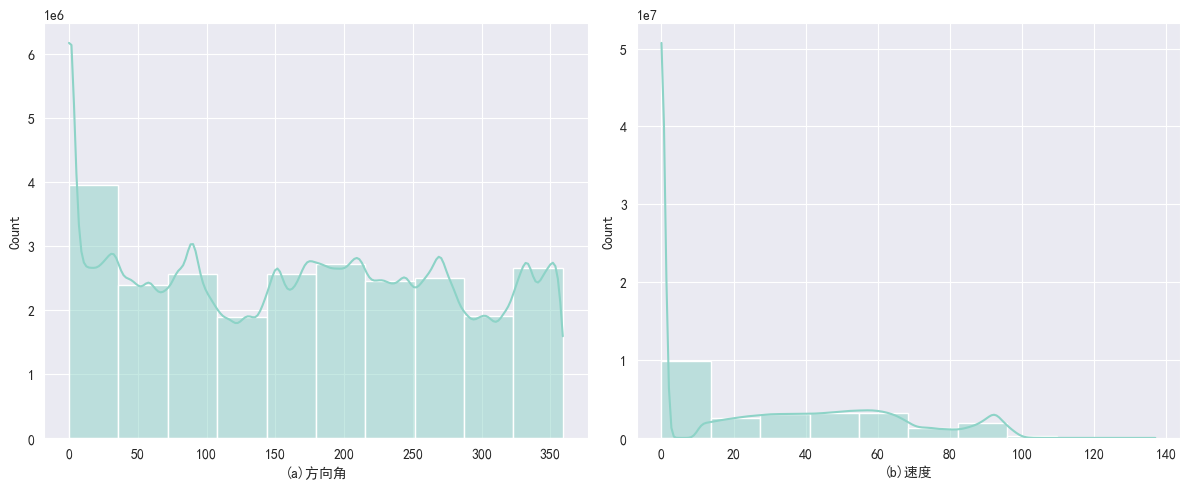

In [49]:
# 创建子图（1 行 2 列）
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# plt.figure(dpi = 200)
sns.histplot(df['direction_angle'],bins = 10, kde=True, ax=axes[0])
axes[0].set_xlabel('(a)方向角')

# plt.figure(dpi = 200)
sns.histplot(df['gps_speed'], bins = 10, kde=True, ax=axes[1])
axes[1].set_xlabel('(b)速度')

plt.tight_layout()
plt.show()

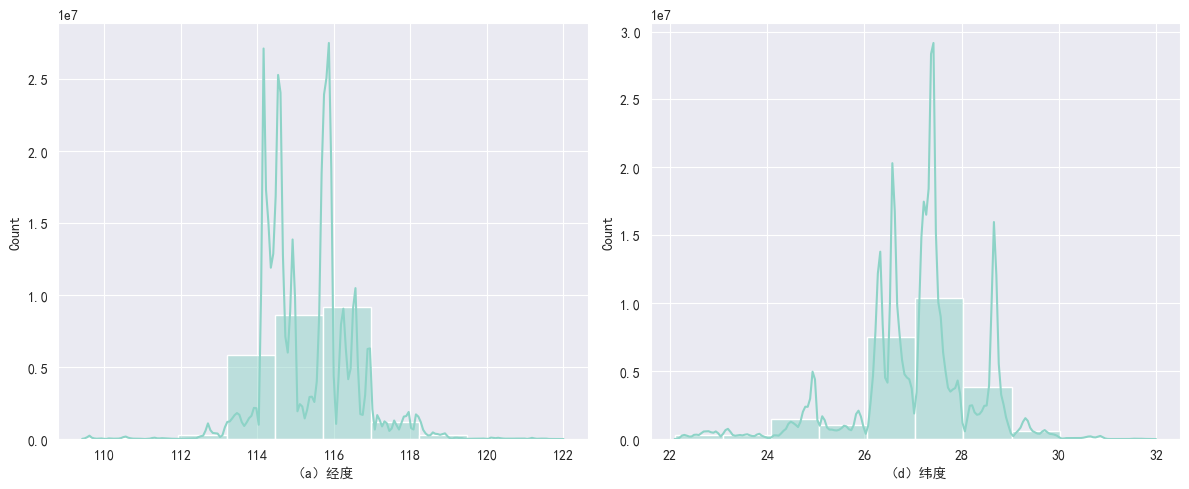

In [50]:
# 经纬度数据
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 创建子图（1 行 2 列）

# 第一个图（左边）
sns.histplot(df['lng'], bins = 10, kde=True, ax=axes[0])
axes[0].set_xlabel('（a）经度')

# 第二个图（右边）
sns.histplot(df['lat'], bins = 10, kde=True, ax=axes[1])
axes[1].set_xlabel("（d）纬度")

plt.tight_layout()
plt.show()

### 2.3 里程

Text(0.5, 0, '里程')

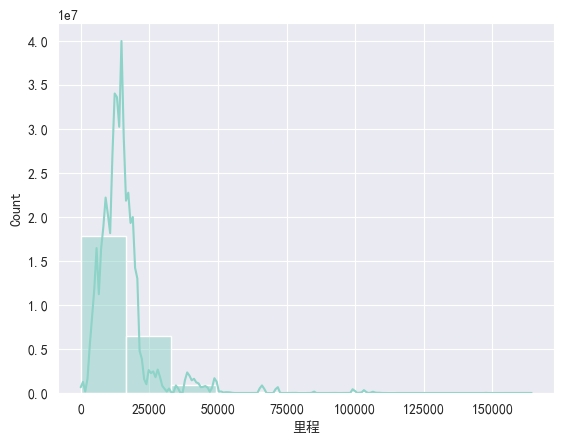

In [56]:
sns.set_style('darkgrid')
# plt.figure(dpi = 200) 
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置全局中文字体
sns.histplot(df['mileage'], bins = 10, kde=True)
plt.xlabel ('里程')

由上面直方图可以看出，里程数据有异常值，需要对异常值进行处理。  
首先，查看里程的异常数据。

In [57]:
# 查看异常里程数据
df.loc[df['mileage'] > 700000]

,vehicleplatenumber,direction_angle,lng,lat,acc_state,location_time,gps_speed,mileage,Hour


In [58]:
# 查看该样本的上下时刻数据，探究异常原因
df.iloc[23159040:23159047,:]

,vehicleplatenumber,direction_angle,lng,lat,acc_state,location_time,gps_speed,mileage,Hour
23159040,AF00342,33,117.36016,27.419548,1,2018-09-28 05:40:05,14,11456,5
23159041,AF00342,33,117.36033,27.419578,1,2018-09-28 05:40:06,13,11456,5
23159042,AF00342,33,117.36053,27.419605,1,2018-09-28 05:40:07,13,11456,5
23159043,AF00342,32,117.36075,27.419631,1,2018-09-28 05:40:08,13,11456,5
23159044,AF00342,36,117.36096,27.419658,1,2018-09-28 05:40:09,14,11456,5
23159045,AF00342,32,117.36118,27.419686,1,2018-09-28 05:40:10,14,11456,5
23159046,AF00342,32,117.36140,27.419713,1,2018-09-28 05:40:11,13,11456,5


从上面的异常数据查看，可以知道，该异常数据属于是单个数据错误，很明显可以根据上下时刻数据进行修正。

In [59]:
# 里程异常值修改
df.iloc[23159045,7] = 11456

Text(0.5, 0, '里程')

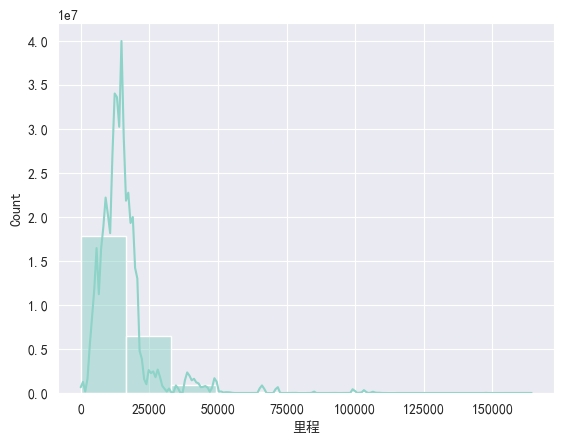

In [60]:
# 重新绘制里程数据分布图
# plt.figure(dpi = 200) # , figsize = (5, 4)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置全局中文字体
sns.histplot(df['mileage'], bins = 10, kde=True)
plt.xlabel ('里程')

### 2.4 时间分布评估

In [311]:
# 注：此时仍未修正经纬度异常值。空间分布情况，由于找不到最初的江西省shp文件了，先跳过。

In [306]:
# 时间字段的处理
df['location_time'] = pd.to_datetime(df['location_time'])
# 提取数据中的小时--方法一--耗时较多
df['Hour'] = df['location_time'].dt.hour

In [ ]:
# 2、数据量的小时集计
# 分组并统计各组数量
Hourcount = df.groupby('Hour')['vehicleplatenumber'].count()
Hourcount = Hourcount.rename('count').reset_index()  # 更改Series列名，并通过reset_index将Series变成DataFrame
Hourcount.T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,1571628,1527869,1307307,1212938,1104827,1360171,1468031,1394472,1281713,1039644,...,62274,34252,23135,19846,3783,3554,7244,128441,696051,1302727


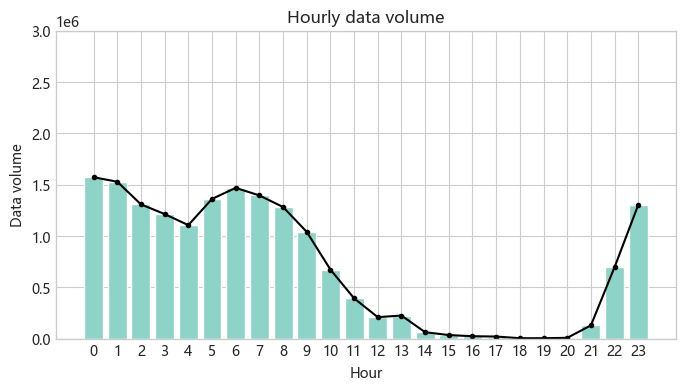

In [308]:
# 数据量时间分布的折线图绘制
# 1、创建图表
fig = plt.figure(1, (8, 4), dpi = 100)  # 创建一个图，图的尺寸为 8*4 dpi为200
# 在图中创建子图
ax = plt.subplot(111)  # 111分别表示：创建1个子图，子图的布局为1行1列

# 2、在图上画
plt.plot(Hourcount['Hour'], Hourcount['count'], 'k-')  # 绘制折线图，分别传入节点的x坐标与y坐标，'k-'定义了黑色实线
plt.plot(Hourcount['Hour'], Hourcount['count'], 'k.')  # 绘制散点图，分别传入节点的x坐标与y坐标，'k.'定义了黑色散点
plt.bar(Hourcount['Hour'], Hourcount['count'])  # 绘制柱状图，分别传入节点的x坐标与y坐标

# 3、调整图中元素
plt.ylabel('Data volume')  # 加y轴标题
plt.xlabel('Hour')  # 加x轴标题
plt.xticks(range(24), range(24))  # 调整x轴标签
plt.title('Hourly data volume')  # 加图标题
plt.ylim(0, 3000000)  # 设置y轴范围

plt.show()  # 显示图

In [309]:
# # 暂时保存数据
# df.to_csv(r'E:\数据文件\Jupyter\课程作业\多元结课论文\05-12/step1_df.csv',index = False) # 取消索引列
# df

# 3、特征工程

## 3.1 导入原始数据df，并提取出行程段oddata

In [ ]:
# 加载库
import os
import pandas as pd
import numpy as np
os.chdir("E:\数据文件\Jupyter\课程作业\多元结课论文\数据及代码\数据处理代码")
df = pd.read_csv(r'../../data/step1_df.csv')

In [100]:
df

,vehicleplatenumber,direction_angle,lng,lat,acc_state,location_time,gps_speed,mileage,Hour
0,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:02,0,4678,1
1,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:04,0,4678,1
2,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:05,0,4678,1
3,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:06,0,4678,1
4,AA00001,120,115.944523,28.651165,1,2018-08-04 01:22:07,0,4678,1
...,...,...,...,...,...,...,...,...,...
25568793,AM00428,0,118.965108,24.887016,1,2018-10-08 20:56:15,0,22225,20
25568794,AM00428,0,118.965108,24.887016,1,2018-10-08 20:56:16,0,22225,20
25568795,AM00428,0,118.965108,24.887016,1,2018-10-08 20:56:17,0,22225,20
25568796,AM00428,0,118.965108,24.887016,1,2018-10-08 20:56:18,0,22225,20


In [101]:
df.columns

Index(['vehicleplatenumber', 'direction_angle', 'lng', 'lat', 'acc_state',
       'location_time', 'gps_speed', 'mileage', 'Hour'],
      dtype='object')

在最早处理数据的时候，存在这索引行和真实的行数不对应的情况，所以前面重新设置了index。后面就无需再考虑这个问题了

## 3.2 行程段提取

In [102]:
# 将时间数据由字符类型转换为时间类型（可运算）
df['location_time'] = pd.to_datetime(df['location_time'], format='%Y-%m-%d %H:%M:%S')
# 构建acc_change列
df['acc_change'] = df['acc_state'] - df['acc_state'].shift()
# 
df['in'] = df.index
# 筛选出行程开始和行程结束的信息
oddata = df[(df['acc_change'] == 1) | (df['acc_change'] == -1) & (df['vehicleplatenumber'].shift() == df['vehicleplatenumber'])]
# 删除无用列
oddata = oddata.drop(['direction_angle','acc_state', 'gps_speed','Hour'], axis = 1)

In [103]:
oddata

,vehicleplatenumber,lng,lat,location_time,mileage,acc_change,in
9213,AA00001,117.311740,29.328153,2018-08-04 04:17:07,4882,-1.0,9213
9215,AA00001,117.311730,29.328111,2018-08-04 05:19:13,4882,1.0,9215
10616,AA00001,117.311946,29.328498,2018-08-04 05:42:53,4888,-1.0,10616
10618,AA00001,117.311946,29.328498,2018-08-04 09:58:32,4888,1.0,10618
11673,AA00001,117.334486,29.324376,2018-08-04 10:16:21,4891,-1.0,11673
...,...,...,...,...,...,...,...
25549551,AM00428,117.137243,28.972848,2018-09-26 11:49:22,19338,1.0,25549551
25550686,AM00428,117.129863,28.961888,2018-09-26 12:08:32,19342,-1.0,25550686
25550871,AM00428,117.129783,28.961856,2018-09-26 23:15:11,19342,1.0,25550871
25562610,AM00428,117.572091,29.543928,2018-09-27 03:58:37,19467,-1.0,25562610


In [104]:
## 给oddata更改列名
oddata.columns = ['Vehicle_Num','Slng', 'Slat', 'Stime', 'Smileage' , 'acc_change', 'Sin']
# 把一个形成的两个数据合成一行
oddata['Etime'] = oddata['Stime'].shift(-1)
oddata['Elng'] = oddata['Slng'].shift(-1)
oddata['Elat'] = oddata['Slat'].shift(-1)
oddata['Emileage'] = oddata['Smileage'].shift(-1)
oddata['Ein'] = oddata['Sin'].shift(-1)
# 筛选行程开始与结束的正确数据
# 注意，考虑引入短时间停车
oddata = oddata[(oddata['acc_change'] == 1) & (oddata['Vehicle_Num'] == oddata['Vehicle_Num'].shift(-1))]
# 去掉acc_change列
oddata = oddata.drop('acc_change', axis = 1)
## 剔除较短和较长的行程段
oddata['con_time'] = pd.to_datetime(oddata['Etime'])-pd.to_datetime(oddata['Stime'])  # , format='%Y-%m-%d %H:%M:%S'
# 删除行程小于5分钟，大于8小时的数据
oddata.drop(oddata.loc[(oddata['con_time'] > '08:00:00') | (oddata['con_time'] < '00:05:00')].index, axis = 0, inplace = True)
oddata

,Vehicle_Num,Slng,Slat,Stime,Smileage,Sin,Etime,Elng,Elat,Emileage,Ein,con_time
9215,AA00001,117.311730,29.328111,2018-08-04 05:19:13,4882,9215,2018-08-04 05:42:53,117.311946,29.328498,4888.0,10616.0,0 days 00:23:40
10618,AA00001,117.311946,29.328498,2018-08-04 09:58:32,4888,10618,2018-08-04 10:16:21,117.334486,29.324376,4891.0,11673.0,0 days 00:17:49
11679,AA00001,117.334533,29.324583,2018-08-04 11:23:23,4891,11679,2018-08-04 11:40:36,117.311763,29.328105,4894.0,12696.0,0 days 00:17:13
12856,AA00001,117.311843,29.328248,2018-08-05 02:46:28,4894,12856,2018-08-05 03:14:02,117.334568,29.324305,4897.0,14487.0,0 days 00:27:34
14491,AA00001,117.334610,29.324316,2018-08-05 05:24:45,4897,14491,2018-08-05 09:28:25,115.860658,28.816390,5131.0,27737.0,0 days 04:03:40
...,...,...,...,...,...,...,...,...,...,...,...,...
25537078,AM00428,117.147938,28.979415,2018-09-26 03:37:23,19242,25537078,2018-09-26 03:56:05,117.129690,28.961600,19247.0,25538182.0,0 days 00:18:42
25538372,AM00428,117.129696,28.961605,2018-09-26 04:39:48,19247,25538372,2018-09-26 06:17:53,117.463853,29.419930,19293.0,25544134.0,0 days 01:38:05
25544516,AM00428,117.463836,29.419730,2018-09-26 09:09:38,19293,25544516,2018-09-26 10:31:43,117.137243,28.972870,19338.0,25549363.0,0 days 01:22:05
25549551,AM00428,117.137243,28.972848,2018-09-26 11:49:22,19338,25549551,2018-09-26 12:08:32,117.129863,28.961888,19342.0,25550686.0,0 days 00:19:10


行程段由7964个变为5401个，表明小于5min和大于8h的数据共有2563个。

In [105]:
## 提前为groupby做准备，即按照两列进行分组。
oddata['bianhao'] = np.arange(1,5402,1)
oddata

,Vehicle_Num,Slng,Slat,Stime,Smileage,Sin,Etime,Elng,Elat,Emileage,Ein,con_time,bianhao
9215,AA00001,117.311730,29.328111,2018-08-04 05:19:13,4882,9215,2018-08-04 05:42:53,117.311946,29.328498,4888.0,10616.0,0 days 00:23:40,1
10618,AA00001,117.311946,29.328498,2018-08-04 09:58:32,4888,10618,2018-08-04 10:16:21,117.334486,29.324376,4891.0,11673.0,0 days 00:17:49,2
11679,AA00001,117.334533,29.324583,2018-08-04 11:23:23,4891,11679,2018-08-04 11:40:36,117.311763,29.328105,4894.0,12696.0,0 days 00:17:13,3
12856,AA00001,117.311843,29.328248,2018-08-05 02:46:28,4894,12856,2018-08-05 03:14:02,117.334568,29.324305,4897.0,14487.0,0 days 00:27:34,4
14491,AA00001,117.334610,29.324316,2018-08-05 05:24:45,4897,14491,2018-08-05 09:28:25,115.860658,28.816390,5131.0,27737.0,0 days 04:03:40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25537078,AM00428,117.147938,28.979415,2018-09-26 03:37:23,19242,25537078,2018-09-26 03:56:05,117.129690,28.961600,19247.0,25538182.0,0 days 00:18:42,5397
25538372,AM00428,117.129696,28.961605,2018-09-26 04:39:48,19247,25538372,2018-09-26 06:17:53,117.463853,29.419930,19293.0,25544134.0,0 days 01:38:05,5398
25544516,AM00428,117.463836,29.419730,2018-09-26 09:09:38,19293,25544516,2018-09-26 10:31:43,117.137243,28.972870,19338.0,25549363.0,0 days 01:22:05,5399
25549551,AM00428,117.137243,28.972848,2018-09-26 11:49:22,19338,25549551,2018-09-26 12:08:32,117.129863,28.961888,19342.0,25550686.0,0 days 00:19:10,5400


以第一个形成段为例，其 bianhao 为1，那么根据Sin（指的是本行程段开始的时刻对应的df中的index）和 Ein（指的是本行程段结束的时刻对应的df中的index）  
补充：  
oddata表中的数据中，每行对应1个行程段，一个司机可能有多个行程段（比如中途停车休息了）  
以 S 开头的表示行程段的起始时刻信息，如起始的时间；  
以 E 开头的表示行程段的结束时刻信息，如结束的时间。

In [106]:
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import time
# 注：这段代码相对较慢，需要考虑优化
l = []
label = []
for i in tqdm(range(oddata.shape[0])):  # 
    st = oddata.iloc[i]['Sin']
    en   = oddata.iloc[i]['Ein']
    # if (df['in']>= st) & (df['in'] <= en):#  & 
    t = df[(df['in']>= st) & (df['in'] <= en)].index
    s = [i] * len(t)
    for j in range(len(t)):
        l.append(t[j])
        label.append(s[j])
    # 假设这代码部分需要0.05s，循环执行60次
    time.sleep(0.05)

100%|██████████| 5401/5401 [09:33<00:00,  9.42it/s]


In [107]:
%time
# 合并成列表
temp = pd.DataFrame(l,columns=['l'])

CPU times: total: 0 ns
Wall time: 0 ns


In [108]:
temp['label'] = label
temp['label'] = temp['label'] + 1
temp

,l,label
0,9215,1
1,9216,1
2,9217,1
3,9218,1
4,9219,1
...,...,...
17048263,25562606,5401
17048264,25562607,5401
17048265,25562608,5401
17048266,25562609,5401


In [109]:
df['con'] = df.index
temp['con'] = temp['l']
df = pd.merge(df, temp, on = 'con', how = 'right')
df

,vehicleplatenumber,direction_angle,lng,lat,acc_state,location_time,gps_speed,mileage,Hour,acc_change,in,con,l,label
0,AA00001,0,117.311730,29.328111,1,2018-08-04 05:19:13,0,4882,5,1.0,9215,9215,9215,1
1,AA00001,0,117.311730,29.328111,1,2018-08-04 05:19:17,0,4882,5,0.0,9216,9216,9216,1
2,AA00001,0,117.311730,29.328111,1,2018-08-04 05:19:18,0,4882,5,0.0,9217,9217,9217,1
3,AA00001,0,117.311730,29.328111,1,2018-08-04 05:19:19,0,4882,5,0.0,9218,9218,9218,1
4,AA00001,0,117.311730,29.328111,1,2018-08-04 05:19:21,0,4882,5,0.0,9219,9219,9219,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048263,AM00428,90,117.572091,29.543928,1,2018-09-27 03:58:33,0,19467,3,0.0,25562606,25562606,25562606,5401
17048264,AM00428,90,117.572091,29.543928,1,2018-09-27 03:58:34,0,19467,3,0.0,25562607,25562607,25562607,5401
17048265,AM00428,90,117.572091,29.543928,1,2018-09-27 03:58:35,0,19467,3,0.0,25562608,25562608,25562608,5401
17048266,AM00428,90,117.572091,29.543928,1,2018-09-27 03:58:36,0,19467,3,0.0,25562609,25562609,25562609,5401


In [93]:
# 缺失值填充为 -1 or 不填充

在最初的代码中，为了确保编号数据是对应的，又采取了编号数据验证。不过由于验证通过，此处省略验证代码。  
df_bianhao[(df_bianhao['list_2'] >= 501) & (df_bianhao['list_2'] <= 1000)]

In [112]:
df['bianhao'] = df['label']
df[df['bianhao'] >= 5401]
# df

,vehicleplatenumber,direction_angle,lng,lat,acc_state,location_time,gps_speed,mileage,Hour,acc_change,in,con,l,label,bianhao
17036528,AM00428,0,117.129783,28.961856,1,2018-09-26 23:15:11,0,19342,23,1.0,25550871,25550871,25550871,5401,5401
17036529,AM00428,0,117.129783,28.961855,1,2018-09-26 23:15:12,0,19342,23,0.0,25550872,25550872,25550872,5401,5401
17036530,AM00428,0,117.129783,28.961856,1,2018-09-26 23:15:14,0,19342,23,0.0,25550873,25550873,25550873,5401,5401
17036531,AM00428,0,117.129783,28.961856,1,2018-09-26 23:15:15,0,19342,23,0.0,25550874,25550874,25550874,5401,5401
17036532,AM00428,0,117.129783,28.961856,1,2018-09-26 23:15:16,0,19342,23,0.0,25550875,25550875,25550875,5401,5401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048263,AM00428,90,117.572091,29.543928,1,2018-09-27 03:58:33,0,19467,3,0.0,25562606,25562606,25562606,5401,5401
17048264,AM00428,90,117.572091,29.543928,1,2018-09-27 03:58:34,0,19467,3,0.0,25562607,25562607,25562607,5401,5401
17048265,AM00428,90,117.572091,29.543928,1,2018-09-27 03:58:35,0,19467,3,0.0,25562608,25562608,25562608,5401,5401
17048266,AM00428,90,117.572091,29.543928,1,2018-09-27 03:58:36,0,19467,3,0.0,25562609,25562609,25562609,5401,5401


In [113]:
df_copy = df.copy(deep=True)

## 3.3 驾驶行为特征提取

In [114]:
df.columns

Index(['vehicleplatenumber', 'direction_angle', 'lng', 'lat', 'acc_state',
       'location_time', 'gps_speed', 'mileage', 'Hour', 'acc_change', 'in',
       'con', 'l', 'label', 'bianhao'],
      dtype='object')

In [115]:
df

,vehicleplatenumber,direction_angle,lng,lat,acc_state,location_time,gps_speed,mileage,Hour,acc_change,in,con,l,label,bianhao
0,AA00001,0,117.311730,29.328111,1,2018-08-04 05:19:13,0,4882,5,1.0,9215,9215,9215,1,1
1,AA00001,0,117.311730,29.328111,1,2018-08-04 05:19:17,0,4882,5,0.0,9216,9216,9216,1,1
2,AA00001,0,117.311730,29.328111,1,2018-08-04 05:19:18,0,4882,5,0.0,9217,9217,9217,1,1
3,AA00001,0,117.311730,29.328111,1,2018-08-04 05:19:19,0,4882,5,0.0,9218,9218,9218,1,1
4,AA00001,0,117.311730,29.328111,1,2018-08-04 05:19:21,0,4882,5,0.0,9219,9219,9219,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048263,AM00428,90,117.572091,29.543928,1,2018-09-27 03:58:33,0,19467,3,0.0,25562606,25562606,25562606,5401,5401
17048264,AM00428,90,117.572091,29.543928,1,2018-09-27 03:58:34,0,19467,3,0.0,25562607,25562607,25562607,5401,5401
17048265,AM00428,90,117.572091,29.543928,1,2018-09-27 03:58:35,0,19467,3,0.0,25562608,25562608,25562608,5401,5401
17048266,AM00428,90,117.572091,29.543928,1,2018-09-27 03:58:36,0,19467,3,0.0,25562609,25562609,25562609,5401,5401


In [116]:
##
df['bianhao'] = df['label']
df = df.drop(['Hour', 'lng', 'lat', 'con', 'l','in', 'label'],axis = 1)
df.head()

,vehicleplatenumber,direction_angle,acc_state,location_time,gps_speed,mileage,acc_change,bianhao
0,AA00001,0,1,2018-08-04 05:19:13,0,4882,1.0,1
1,AA00001,0,1,2018-08-04 05:19:17,0,4882,0.0,1
2,AA00001,0,1,2018-08-04 05:19:18,0,4882,0.0,1
3,AA00001,0,1,2018-08-04 05:19:19,0,4882,0.0,1
4,AA00001,0,1,2018-08-04 05:19:21,0,4882,0.0,1


In [117]:
df

,vehicleplatenumber,direction_angle,acc_state,location_time,gps_speed,mileage,acc_change,bianhao
0,AA00001,0,1,2018-08-04 05:19:13,0,4882,1.0,1
1,AA00001,0,1,2018-08-04 05:19:17,0,4882,0.0,1
2,AA00001,0,1,2018-08-04 05:19:18,0,4882,0.0,1
3,AA00001,0,1,2018-08-04 05:19:19,0,4882,0.0,1
4,AA00001,0,1,2018-08-04 05:19:21,0,4882,0.0,1
...,...,...,...,...,...,...,...,...
17048263,AM00428,90,1,2018-09-27 03:58:33,0,19467,0.0,5401
17048264,AM00428,90,1,2018-09-27 03:58:34,0,19467,0.0,5401
17048265,AM00428,90,1,2018-09-27 03:58:35,0,19467,0.0,5401
17048266,AM00428,90,1,2018-09-27 03:58:36,0,19467,0.0,5401


In [118]:
tzdata = df.copy(deep = True)

In [ ]:
# 得到时间差
import datetime
from datetime import datetime,timedelta
tzdata['deta_time'] = tzdata['location_time'].shift(-1) - tzdata['location_time']
tzdata['deta_time'] = tzdata['deta_time'].apply(lambda x:timedelta.total_seconds(x) if not pd.isnull(x) else pd.NaT)
tzdata['deta_time'].iloc[-1] = 1
# 剔除时间差为0的重复数据
tzdata = tzdata.drop(labels = tzdata.loc[tzdata['deta_time'] == 0].index, axis= 0)
# 计算速度差
tzdata['deta_speed'] = tzdata['gps_speed'].shift(-1) - tzdata['gps_speed']
# 计算acc_change列
tzdata['acc_change'] = tzdata['acc_state'].shift(-1) - tzdata['acc_state']
# 计算veh2列
tzdata['veh2'] = tzdata['vehicleplatenumber'].shift(-1)
# 计算角度差
tzdata['deta_angle'] = tzdata['direction_angle'].shift(-1) - tzdata['direction_angle']
tzdata.head()
# tzdata = tzdata[['vehicleplatenumber', 'direction_angle' , 'acc_state', 'location_time', 'gps_speed', 'mileage', 'veh2', 'deta_angle', 'acc_change', 'deta_time', 'deta_speed']]

,vehicleplatenumber,direction_angle,acc_state,location_time,gps_speed,mileage,acc_change,bianhao,deta_time,deta_speed,veh2,deta_angle
0,AA00001,0,1,2018-08-04 05:19:13,0,4882,0.0,1,4.0,0.0,AA00001,0.0
1,AA00001,0,1,2018-08-04 05:19:17,0,4882,0.0,1,1.0,0.0,AA00001,0.0
2,AA00001,0,1,2018-08-04 05:19:18,0,4882,0.0,1,1.0,0.0,AA00001,0.0
3,AA00001,0,1,2018-08-04 05:19:19,0,4882,0.0,1,2.0,0.0,AA00001,0.0
4,AA00001,0,1,2018-08-04 05:19:21,0,4882,0.0,1,1.0,0.0,AA00001,0.0


### 计算危险转向

In [120]:
# %%time
# 计算超速率  --  指标3
import numpy as np
@np.vectorize
def weixian_zx(vehicleplatenumber, veh2, deta_angle, acc_change, gps_speed, deta_time):
    if abs(deta_angle/deta_time) >= 30 and acc_change == 0 and vehicleplatenumber == veh2 and gps_speed > 30:
        return 1  # 单位为千米
    else:
        return 0
weixian_zx = weixian_zx(tzdata['vehicleplatenumber'], tzdata['veh2'], tzdata['deta_angle'], tzdata['acc_change'], tzdata['gps_speed'], tzdata['deta_time'])
tzdata['weixian_zx'] = weixian_zx

### 计算超速率

In [121]:
# %%time
# 计算超速率  --  指标3
import numpy as np
@np.vectorize
def chaosu_mile(vehicleplatenumber, veh2, acc_state, acc_change, gps_speed, deta_time):
    if acc_state == 1 and acc_change == 0 and vehicleplatenumber == veh2 and gps_speed > 80:
        return gps_speed * deta_time / 3600  # 单位为千米
    else:
        return 0
chaosu_mile = chaosu_mile(tzdata['vehicleplatenumber'], tzdata['veh2'], tzdata['acc_state'], tzdata['acc_change'], tzdata['gps_speed'], tzdata['deta_time'])
tzdata['chaosu_mile'] = chaosu_mile

### 计算急加速率

In [122]:
# %%time
# 计算急加速率  --  指标3
# 计算加速度
tzdata['jiasudu'] = tzdata['deta_speed'] / (3.6 *tzdata['deta_time'])  # 单位为m/s^2
import numpy as np
@np.vectorize
def jijiasu(vehicleplatenumber, veh2, acc_state, acc_change, jiasudu):
    if acc_state == 1 and acc_change == 0 and vehicleplatenumber == veh2 and jiasudu > 3:
        return 1  # 单位为千米
    else:
        return 0
jijiasu = jijiasu(tzdata['vehicleplatenumber'], tzdata['veh2'], tzdata['acc_state'], tzdata['acc_change'], tzdata['jiasudu'])
tzdata['jijiasu'] = jijiasu

### 计算急减速率

In [123]:
# %%time
# 计算急减速率  --  指标3
import numpy as np
@np.vectorize
def jijiansu(vehicleplatenumber, veh2, acc_state, acc_change, jiasudu):
    if acc_state == 1 and acc_change == 0 and vehicleplatenumber == veh2 and jiasudu < -3:
        return 1  # 单位为千米
    else:
        return 0
jijiansu = jijiansu(tzdata['vehicleplatenumber'], tzdata['veh2'], tzdata['acc_state'], tzdata['acc_change'], tzdata['jiasudu'])
tzdata['jijiansu'] = jijiansu

### 怠速不良

In [125]:
## 计算怠速不良比率  -- 指标6
daisubuliang = tzdata[ ((tzdata['acc_state'] == 1) & (tzdata['acc_change'].shift() == 1)) | ((tzdata['gps_speed'] == 0) & (tzdata['deta_speed'].shift() < 0)) | ((tzdata['acc_state'] == 0) & (tzdata['acc_change'].shift() == -1)) | ((tzdata['gps_speed'] == 0) & (tzdata['deta_speed'] >0)) & (tzdata['vehicleplatenumber'] == tzdata['veh2'])]
daisubuliang

,vehicleplatenumber,direction_angle,acc_state,location_time,gps_speed,mileage,acc_change,bianhao,deta_time,deta_speed,veh2,deta_angle,weixian_zx,chaosu_mile,jiasudu,jijiasu,jijiansu
373,AA00001,253,1,2018-08-04 05:25:36,0,4883,0.0,1,1.0,10.0,AA00001,-13.0,0,0,2.777778,0,0
377,AA00001,239,1,2018-08-04 05:25:40,0,4883,0.0,1,1.0,0.0,AA00001,-3.0,0,0,0.0,0,0
384,AA00001,256,1,2018-08-04 05:25:47,0,4883,0.0,1,1.0,11.0,AA00001,6.0,0,0,3.055556,1,0
424,AA00001,199,1,2018-08-04 05:26:27,0,4883,0.0,1,1.0,0.0,AA00001,-15.0,0,0,0.0,0,0
527,AA00001,110,1,2018-08-04 05:28:11,0,4883,0.0,1,1.0,10.0,AA00001,-8.0,0,0,2.777778,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17044744,AM00428,88,1,2018-09-27 02:58:24,0,19415,0.0,5401,1.0,0.0,AM00428,2.0,0,0,0.0,0,0
17044760,AM00428,87,1,2018-09-27 02:58:40,0,19415,0.0,5401,1.0,10.0,AM00428,-2.0,0,0,2.777778,0,0
17044763,AM00428,80,1,2018-09-27 02:58:43,0,19415,0.0,5401,1.0,12.0,AM00428,7.0,0,0,3.333333,1,0
17048083,AM00428,38,1,2018-09-27 03:55:27,0,19467,0.0,5401,1.0,0.0,AM00428,21.0,0,0,0.0,0,0


In [126]:
## 类似提取行程段的方式从上面提取不良怠速情况
## another 不良怠速率也可尝试使用不良怠速次数/总怠速次数来确定
daisubuliang = daisubuliang.rename(columns={'location_time':'start_time'})
daisubuliang['end_time'] = daisubuliang['start_time'].shift(-1)
daisubuliang2 = daisubuliang[((daisubuliang['acc_state'] == 0) & (daisubuliang['acc_change'].shift() == -1)) | ((daisubuliang['gps_speed'] == 0) & (daisubuliang['deta_speed'] >0)) & (daisubuliang['vehicleplatenumber'] == daisubuliang['veh2'])]
daisubuliang2

,vehicleplatenumber,direction_angle,acc_state,start_time,gps_speed,mileage,acc_change,bianhao,deta_time,deta_speed,veh2,deta_angle,weixian_zx,chaosu_mile,jiasudu,jijiasu,jijiansu,end_time
373,AA00001,253,1,2018-08-04 05:25:36,0,4883,0.0,1,1.0,10.0,AA00001,-13.0,0,0,2.777778,0,0,2018-08-04 05:25:40
384,AA00001,256,1,2018-08-04 05:25:47,0,4883,0.0,1,1.0,11.0,AA00001,6.0,0,0,3.055556,1,0,2018-08-04 05:26:27
527,AA00001,110,1,2018-08-04 05:28:11,0,4883,0.0,1,1.0,10.0,AA00001,-8.0,0,0,2.777778,0,0,2018-08-04 05:31:26
726,AA00001,99,1,2018-08-04 05:31:32,0,4884,0.0,1,1.0,12.0,AA00001,-4.0,0,0,3.333333,1,0,2018-08-04 05:32:52
1031,AA00001,277,1,2018-08-04 05:36:40,0,4885,0.0,1,1.0,11.0,AA00001,1.0,0,0,3.055556,1,0,2018-08-04 05:40:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17044380,AM00428,157,1,2018-09-27 02:52:14,0,19414,0.0,5401,1.0,11.0,AM00428,-2.0,0,0,3.055556,1,0,2018-09-27 02:52:59
17044540,AM00428,138,1,2018-09-27 02:54:58,0,19415,0.0,5401,1.0,13.0,AM00428,-4.0,0,0,3.611111,1,0,2018-09-27 02:55:11
17044687,AM00428,143,1,2018-09-27 02:57:26,0,19415,0.0,5401,1.0,10.0,AM00428,1.0,0,0,2.777778,0,0,2018-09-27 02:58:24
17044760,AM00428,87,1,2018-09-27 02:58:40,0,19415,0.0,5401,1.0,10.0,AM00428,-2.0,0,0,2.777778,0,0,2018-09-27 02:58:43


In [128]:
# %%time
daisubuliang2['daisu_time'] = pd.to_datetime(daisubuliang2['end_time']) - pd.to_datetime(daisubuliang2['start_time'])
from datetime import timedelta, datetime
daisubuliang2['daisu_time'] = daisubuliang2['daisu_time'].apply(lambda x:timedelta.total_seconds(x) if not pd.isnull(x) else pd.NaT)
daisubuliang2['daisu_time'].iloc[-1] = 1

In [129]:
# 剔除超过10min以上的异常怠速数据      ------ 或者改成30min
daisubuliang2 = daisubuliang2[daisubuliang2['daisu_time'] <= 1800]
daisubuliang2 = daisubuliang2[['vehicleplatenumber','start_time', 'end_time', 'daisu_time', 'bianhao']]
daisubuliang2

,vehicleplatenumber,start_time,end_time,daisu_time,bianhao
373,AA00001,2018-08-04 05:25:36,2018-08-04 05:25:40,4.0,1
384,AA00001,2018-08-04 05:25:47,2018-08-04 05:26:27,40.0,1
527,AA00001,2018-08-04 05:28:11,2018-08-04 05:31:26,195.0,1
726,AA00001,2018-08-04 05:31:32,2018-08-04 05:32:52,80.0,1
1031,AA00001,2018-08-04 05:36:40,2018-08-04 05:40:20,220.0,1
...,...,...,...,...,...
17044380,AM00428,2018-09-27 02:52:14,2018-09-27 02:52:59,45.0,5401
17044540,AM00428,2018-09-27 02:54:58,2018-09-27 02:55:11,13.0,5401
17044687,AM00428,2018-09-27 02:57:26,2018-09-27 02:58:24,58.0,5401
17044760,AM00428,2018-09-27 02:58:40,2018-09-27 02:58:43,3.0,5401


In [130]:
## 判断是否属于怠速不良
daisubuliang2['daisubuliang'] = daisubuliang2['daisu_time'].apply(lambda x:1 if x >= 90 else 0)
daisubuliang2

,vehicleplatenumber,start_time,end_time,daisu_time,bianhao,daisubuliang
373,AA00001,2018-08-04 05:25:36,2018-08-04 05:25:40,4.0,1,0
384,AA00001,2018-08-04 05:25:47,2018-08-04 05:26:27,40.0,1,0
527,AA00001,2018-08-04 05:28:11,2018-08-04 05:31:26,195.0,1,1
726,AA00001,2018-08-04 05:31:32,2018-08-04 05:32:52,80.0,1,0
1031,AA00001,2018-08-04 05:36:40,2018-08-04 05:40:20,220.0,1,1
...,...,...,...,...,...,...
17044380,AM00428,2018-09-27 02:52:14,2018-09-27 02:52:59,45.0,5401,0
17044540,AM00428,2018-09-27 02:54:58,2018-09-27 02:55:11,13.0,5401,0
17044687,AM00428,2018-09-27 02:57:26,2018-09-27 02:58:24,58.0,5401,0
17044760,AM00428,2018-09-27 02:58:40,2018-09-27 02:58:43,3.0,5401,0


In [131]:
daisu_grouped = daisubuliang2.groupby(['vehicleplatenumber', 'bianhao'])
daisubuliang_times = daisu_grouped['daisubuliang'].agg(np.sum)
daisu_times = daisu_grouped['daisubuliang'].agg(np.size)

### 针对行程段数据 oddata

In [132]:
oddata['con_time'] = oddata['con_time'].apply(lambda x:timedelta.total_seconds(x) if not pd.isnull(x) else pd.NaT)
oddata['drive_overtime'] = oddata['con_time'].apply(lambda x: x-14400 if x > 14400 else 0)
oddata['deta_mile'] = oddata['Emileage'] - oddata['Smileage']

In [133]:
oddata_grouped = oddata.groupby(['Vehicle_Num', 'bianhao'])

# %%time
# 计算怠速不良次数
group_data = pd.DataFrame(daisubuliang_times)
group_data['daisubuliang_times'] = group_data['daisubuliang']
group_data.drop(['daisubuliang'], axis = 1, inplace= True)
# 计算怠速次数
group_data['daisu_times'] = daisu_times
group_data.head()
## 计算疲劳驾驶情况
# 计算疲劳驾驶时间
group_data['drive_overtime'] = oddata_grouped['drive_overtime'].agg(np.sum)
# group_data['drive_overtime'] = drive_overtime

# 计算总的驾驶时间
group_data['drive_time']  = oddata_grouped['con_time'].agg(np.sum)
# group_data['drive_time'] = drive_time

# 计算总的驾驶里程
group_data['drive_mile'] = oddata_grouped['deta_mile'].agg(np.sum)
# group_data['drive_mile'] = drive_mile
group_data.head()

daisubuliang_times  daisu_times  drive_overtime  \
vehicleplatenumber bianhao                                                    
AA00001            1                         2            6             0.0   
                   2                         1            3             0.0   
                   3                         1            3             0.0   
                   4                         1            7             0.0   
                   5                         8           24           220.0   

                            drive_time  drive_mile  
vehicleplatenumber bianhao                          
AA00001            1            1420.0         6.0  
                   2            1069.0         3.0  
                   3            1033.0         3.0  
                   4            1654.0         3.0  
                   5           14620.0       234.0

### tzdata  危险转向、超速率、急加速率、急减速率

In [134]:
tzdata

,vehicleplatenumber,direction_angle,acc_state,location_time,gps_speed,mileage,acc_change,bianhao,deta_time,deta_speed,veh2,deta_angle,weixian_zx,chaosu_mile,jiasudu,jijiasu,jijiansu
0,AA00001,0,1,2018-08-04 05:19:13,0,4882,0.0,1,4.0,0.0,AA00001,0.0,0,0,0.0,0,0
1,AA00001,0,1,2018-08-04 05:19:17,0,4882,0.0,1,1.0,0.0,AA00001,0.0,0,0,0.0,0,0
2,AA00001,0,1,2018-08-04 05:19:18,0,4882,0.0,1,1.0,0.0,AA00001,0.0,0,0,0.0,0,0
3,AA00001,0,1,2018-08-04 05:19:19,0,4882,0.0,1,2.0,0.0,AA00001,0.0,0,0,0.0,0,0
4,AA00001,0,1,2018-08-04 05:19:21,0,4882,0.0,1,1.0,0.0,AA00001,0.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048263,AM00428,90,1,2018-09-27 03:58:33,0,19467,0.0,5401,1.0,0.0,AM00428,0.0,0,0,0.0,0,0
17048264,AM00428,90,1,2018-09-27 03:58:34,0,19467,0.0,5401,1.0,0.0,AM00428,0.0,0,0,0.0,0,0
17048265,AM00428,90,1,2018-09-27 03:58:35,0,19467,0.0,5401,1.0,0.0,AM00428,0.0,0,0,0.0,0,0
17048266,AM00428,90,1,2018-09-27 03:58:36,0,19467,-1.0,5401,1.0,0.0,AM00428,0.0,0,0,0.0,0,0


In [135]:
# 按照车辆、编号分组聚合。得到每个车，每个行程段的数据
grouped = tzdata.groupby(['vehicleplatenumber', 'bianhao'])

In [136]:
## 计算超速
chaosu_mile = grouped['chaosu_mile'].agg(np.sum)
group_data['chaosu_mile'] = chaosu_mile

## 统计急加速和急减速
jijiasu_times = grouped['jijiasu'].agg(np.sum)
jijiansu_times = grouped['jijiansu'].agg(np.sum)
group_data['jijiasu_times'] = jijiasu_times
group_data['jijiansu_times'] = jijiansu_times

## 计算危险转向次数
wxzx_times = grouped['weixian_zx'].agg(np.sum)
group_data['wxzx_times'] = wxzx_times
group_data.head()

daisubuliang_times  daisu_times  drive_overtime  \
vehicleplatenumber bianhao                                                    
AA00001            1                         2            6             0.0   
                   2                         1            3             0.0   
                   3                         1            3             0.0   
                   4                         1            7             0.0   
                   5                         8           24           220.0   

                            drive_time  drive_mile  chaosu_mile  \
vehicleplatenumber bianhao                                        
AA00001            1            1420.0         6.0            0   
                   2            1069.0         3.0            0   
                   3            1033.0         3.0            0   
                   4            1654.0         3.0            0   
                   5           14620.0       234.0            0   

                            jijiasu_times  jijiansu_times  wxzx_times  
vehicleplatenumber bianhao                                             
AA00001            1                    5               5           0  
                   2                    3               2           0  
                   3                    2               3           0  
                   4                    6               7           0  
                   5                   20              23          16

In [142]:
oddata

,Vehicle_Num,Slng,Slat,Stime,Smileage,Sin,Etime,Elng,Elat,Emileage,Ein,con_time,bianhao,drive_overtime,deta_mile
9215,AA00001,117.311730,29.328111,2018-08-04 05:19:13,4882,9215,2018-08-04 05:42:53,117.311946,29.328498,4888.0,10616.0,1420.0,1,0.0,6.0
10618,AA00001,117.311946,29.328498,2018-08-04 09:58:32,4888,10618,2018-08-04 10:16:21,117.334486,29.324376,4891.0,11673.0,1069.0,2,0.0,3.0
11679,AA00001,117.334533,29.324583,2018-08-04 11:23:23,4891,11679,2018-08-04 11:40:36,117.311763,29.328105,4894.0,12696.0,1033.0,3,0.0,3.0
12856,AA00001,117.311843,29.328248,2018-08-05 02:46:28,4894,12856,2018-08-05 03:14:02,117.334568,29.324305,4897.0,14487.0,1654.0,4,0.0,3.0
14491,AA00001,117.334610,29.324316,2018-08-05 05:24:45,4897,14491,2018-08-05 09:28:25,115.860658,28.816390,5131.0,27737.0,14620.0,5,220.0,234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25537078,AM00428,117.147938,28.979415,2018-09-26 03:37:23,19242,25537078,2018-09-26 03:56:05,117.129690,28.961600,19247.0,25538182.0,1122.0,5397,0.0,5.0
25538372,AM00428,117.129696,28.961605,2018-09-26 04:39:48,19247,25538372,2018-09-26 06:17:53,117.463853,29.419930,19293.0,25544134.0,5885.0,5398,0.0,46.0
25544516,AM00428,117.463836,29.419730,2018-09-26 09:09:38,19293,25544516,2018-09-26 10:31:43,117.137243,28.972870,19338.0,25549363.0,4925.0,5399,0.0,45.0
25549551,AM00428,117.137243,28.972848,2018-09-26 11:49:22,19338,25549551,2018-09-26 12:08:32,117.129863,28.961888,19342.0,25550686.0,1150.0,5400,0.0,4.0


In [143]:
# 只提取有用的特征信息
oddata2 = oddata[['Vehicle_Num', 'Stime', 'Smileage', 'bianhao']]
print('oddata的大小：', oddata.shape)
oddata2.head()

oddata的大小： (5401, 15)


,Vehicle_Num,Stime,Smileage,bianhao
9215,AA00001,2018-08-04 05:19:13,4882,1
10618,AA00001,2018-08-04 09:58:32,4888,2
11679,AA00001,2018-08-04 11:23:23,4891,3
12856,AA00001,2018-08-05 02:46:28,4894,4
14491,AA00001,2018-08-05 05:24:45,4897,5


In [144]:
group_data2 = pd.merge(group_data, oddata2, on = 'bianhao')
group_data2

,bianhao,daisubuliang_times,daisu_times,drive_overtime,drive_time,drive_mile,chaosu_mile,jijiasu_times,jijiansu_times,wxzx_times,Vehicle_Num,Stime,Smileage
0,1,2,6,0.0,1420.0,6.0,0,5,5,0,AA00001,2018-08-04 05:19:13,4882
1,2,1,3,0.0,1069.0,3.0,0,3,2,0,AA00001,2018-08-04 09:58:32,4888
2,3,1,3,0.0,1033.0,3.0,0,2,3,0,AA00001,2018-08-04 11:23:23,4891
3,4,1,7,0.0,1654.0,3.0,0,6,7,0,AA00001,2018-08-05 02:46:28,4894
4,5,8,24,220.0,14620.0,234.0,0,20,23,16,AA00001,2018-08-05 05:24:45,4897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5121,5397,2,4,0.0,1122.0,5.0,0,4,3,0,AM00428,2018-09-26 03:37:23,19242
5122,5398,10,30,0.0,5885.0,46.0,0,22,27,6,AM00428,2018-09-26 04:39:48,19247
5123,5399,7,17,0.0,4925.0,45.0,0,9,15,1,AM00428,2018-09-26 09:09:38,19293
5124,5400,2,10,0.0,1150.0,4.0,0,6,8,0,AM00428,2018-09-26 11:49:22,19338


# 4、行程段的描述性统计分析

In [145]:
# %%time
# data = pd.read_csv(r'../../data/group_data2.csv')

In [ ]:
s_data = group_data2.copy(deep=True)
s_data.head()

,bianhao,daisubuliang_times,daisu_times,drive_overtime,drive_time,drive_mile,chaosu_mile,jijiasu_times,jijiansu_times,wxzx_times,Vehicle_Num,Stime,Smileage
0,1,2,6,0.0,1420.0,6.0,0,5,5,0,AA00001,2018-08-04 05:19:13,4882
1,2,1,3,0.0,1069.0,3.0,0,3,2,0,AA00001,2018-08-04 09:58:32,4888
2,3,1,3,0.0,1033.0,3.0,0,2,3,0,AA00001,2018-08-04 11:23:23,4891
3,4,1,7,0.0,1654.0,3.0,0,6,7,0,AA00001,2018-08-05 02:46:28,4894
4,5,8,24,220.0,14620.0,234.0,0,20,23,16,AA00001,2018-08-05 05:24:45,4897


In [ ]:
# 将时间数据由字符类型转换为时间类型（可运算）
s_data['Stime'] = pd.to_datetime(s_data['Stime'], format='%Y-%m-%d %H:%M:%S')
col = 'Vehicle_Num'
new_cols = [col] + [c for c in s_data.columns if c != col]
s_data = s_data[new_cols]

In [152]:
s_data.columns

Index(['Vehicle_Num', 'bianhao', 'daisubuliang_times', 'daisu_times',
       'drive_overtime', 'drive_time', 'drive_mile', 'chaosu_mile',
       'jijiasu_times', 'jijiansu_times', 'wxzx_times', 'Stime', 'Smileage'],
      dtype='object')

In [153]:
# 给oddata更改列名
s_data.columns = ['Vehicle_Num','编号', '怠速不良次数', '怠速次数', '疲劳驾驶时长', '驾驶时长', '驾驶里程', '超速里程', '急加速次数', '急减速次数', '危险转向次数', 'Stime', 'Smile']
s_data

,Vehicle_Num,编号,怠速不良次数,怠速次数,疲劳驾驶时长,驾驶时长,驾驶里程,超速里程,急加速次数,急减速次数,危险转向次数,Stime,Smile
0,AA00001,1,2,6,0.0,1420.0,6.0,0,5,5,0,2018-08-04 05:19:13,4882
1,AA00001,2,1,3,0.0,1069.0,3.0,0,3,2,0,2018-08-04 09:58:32,4888
2,AA00001,3,1,3,0.0,1033.0,3.0,0,2,3,0,2018-08-04 11:23:23,4891
3,AA00001,4,1,7,0.0,1654.0,3.0,0,6,7,0,2018-08-05 02:46:28,4894
4,AA00001,5,8,24,220.0,14620.0,234.0,0,20,23,16,2018-08-05 05:24:45,4897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5121,AM00428,5397,2,4,0.0,1122.0,5.0,0,4,3,0,2018-09-26 03:37:23,19242
5122,AM00428,5398,10,30,0.0,5885.0,46.0,0,22,27,6,2018-09-26 04:39:48,19247
5123,AM00428,5399,7,17,0.0,4925.0,45.0,0,9,15,1,2018-09-26 09:09:38,19293
5124,AM00428,5400,2,10,0.0,1150.0,4.0,0,6,8,0,2018-09-26 11:49:22,19338


特征提取：  
平均速度    =  行程段里程/行程段持续时间	Km/h  
疲劳驾驶率  =  按照疲劳驾驶时长/总驾驶时长	  
怠速不良率  =  不良怠速次数/总怠速次数	  
危险转向率  =  危险转向次数/总行驶里程	次/百公里  
超速率      =  超速行驶里程/总行驶里程	  
急加速率    =  急加速次数/总行驶里程	次/百公里  
急减速率    =  急减速次数/总行驶里程	次/百公里  
行驶里程

In [154]:
s_data['avg_speed'] = s_data['驾驶里程'] / s_data['驾驶时长'] * 3600
s_data['drive_overtime_rate'] = s_data['疲劳驾驶时长'] / s_data['驾驶时长']
s_data['daisubuliang_rate'] = s_data['怠速不良次数'] / s_data['怠速次数']
s_data['wxzx_rate'] = s_data['危险转向次数'] / s_data['驾驶里程']
s_data['chaosu_rate'] = s_data['超速里程'] / s_data['驾驶里程']
s_data['jijiasu_rate'] = s_data['急加速次数'] / s_data['驾驶里程']
s_data['jijiansu_rate'] = s_data['急减速次数'] / s_data['驾驶里程']
s_data['drive_mile'] = s_data['驾驶里程']

In [155]:
# 查看平均速度超过100km/h的行程段
s_data[s_data['avg_speed'] >= 100]

,Vehicle_Num,编号,怠速不良次数,怠速次数,疲劳驾驶时长,驾驶时长,驾驶里程,超速里程,急加速次数,急减速次数,...,Stime,Smile,avg_speed,drive_overtime_rate,daisubuliang_rate,wxzx_rate,chaosu_rate,jijiasu_rate,jijiansu_rate,drive_mile
3146,AD00254,3349,11,39,0.0,9290.0,616.0,0,28,30,...,2018-09-25 06:27:05,99167,238.708288,0.000000,0.282051,0.003247,0.0,0.045455,0.048701,616.0
3148,AD00254,3351,0,3,0.0,381.0,46.0,0,2,3,...,2018-09-25 22:03:32,99828,434.645669,0.000000,0.000000,0.000000,0.0,0.043478,0.065217,46.0
3149,AD00254,3352,15,34,0.0,8482.0,2936.0,0,24,26,...,2018-09-25 22:21:26,99876,1246.121198,0.000000,0.441176,0.000000,0.0,0.008174,0.008856,2936.0
3150,AD00254,3353,22,99,4025.0,18425.0,742.0,0,61,65,...,2018-09-26 01:02:35,102812,144.976934,0.218453,0.222222,0.053908,0.0,0.082210,0.087601,742.0
3151,AD00254,3355,9,23,0.0,8032.0,283.0,0,19,18,...,2018-09-26 08:52:38,103554,126.842629,0.000000,0.391304,0.095406,0.0,0.067138,0.063604,283.0
3152,AD00254,3356,5,15,0.0,3849.0,1017.0,0,9,16,...,2018-09-27 03:20:01,105201,951.208106,0.000000,0.333333,0.000000,0.0,0.008850,0.015733,1017.0
3153,AD00254,3357,0,1,0.0,473.0,52.0,0,1,1,...,2018-09-27 05:17:10,106218,395.771670,0.000000,0.000000,0.000000,0.0,0.019231,0.019231,52.0
3154,AD00254,3358,18,32,0.0,7041.0,707.0,0,23,26,...,2018-09-27 06:02:36,106270,361.482744,0.000000,0.562500,0.066478,0.0,0.032532,0.036775,707.0
4715,AF00342,4977,4,27,0.0,1882.0,540.0,0,28,23,...,2018-09-28 06:00:01,10929,1032.943677,0.000000,0.148148,0.031481,0.0,0.051852,0.042593,540.0
4716,AF00342,4978,2,12,0.0,1381.0,516.0,0,19,19,...,2018-09-28 23:30:40,10982,1345.112238,0.000000,0.166667,0.027132,0.0,0.036822,0.036822,516.0


In [157]:
# 查看行程低于10km的行程段
s_data[s_data['drive_mile'] < 11]

,Vehicle_Num,编号,怠速不良次数,怠速次数,疲劳驾驶时长,驾驶时长,驾驶里程,超速里程,急加速次数,急减速次数,...,Stime,Smile,avg_speed,drive_overtime_rate,daisubuliang_rate,wxzx_rate,chaosu_rate,jijiasu_rate,jijiansu_rate,drive_mile
0,AA00001,1,2,6,0.0,1420.0,6.0,0,5,5,...,2018-08-04 05:19:13,4882,15.211268,0.0,0.333333,0.0,0.0,0.833333,0.833333,6.0
1,AA00001,2,1,3,0.0,1069.0,3.0,0,3,2,...,2018-08-04 09:58:32,4888,10.102900,0.0,0.333333,0.0,0.0,1.000000,0.666667,3.0
2,AA00001,3,1,3,0.0,1033.0,3.0,0,2,3,...,2018-08-04 11:23:23,4891,10.454985,0.0,0.333333,0.0,0.0,0.666667,1.000000,3.0
3,AA00001,4,1,7,0.0,1654.0,3.0,0,6,7,...,2018-08-05 02:46:28,4894,6.529625,0.0,0.142857,0.0,0.0,2.000000,2.333333,3.0
15,AA00001,17,1,3,0.0,907.0,10.0,0,2,2,...,2018-09-08 23:08:03,10104,39.691290,0.0,0.333333,0.1,0.0,0.200000,0.200000,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5111,AM00282,5387,1,22,0.0,2137.0,3.0,0,14,16,...,2018-09-30 05:15:48,11412,5.053814,0.0,0.045455,0.0,0.0,4.666667,5.333333,3.0
5115,AM00337,5391,1,2,0.0,326.0,3.0,0,0,2,...,2018-10-09 00:01:39,7605,33.128834,0.0,0.500000,0.0,0.0,0.000000,0.666667,3.0
5119,AM00343,5395,2,18,0.0,1404.0,6.0,0,12,10,...,2018-09-27 08:01:11,14834,15.384615,0.0,0.111111,0.0,0.0,2.000000,1.666667,6.0
5121,AM00428,5397,2,4,0.0,1122.0,5.0,0,4,3,...,2018-09-26 03:37:23,19242,16.042781,0.0,0.500000,0.0,0.0,0.800000,0.600000,5.0


由上面表格可知：  
平均速度超过100km/h的为异常行程段，其中甚至出现了平均速度为900多km/h。样本量较少，为异常/错误数据，予以剔除。  
行驶里程低于11km的路段较多，有1796个行程段。但是这部分行程段，行驶里程过短，无法客观反映驾驶行为。其次，也存在像平均速度在6km/h或10km/h这样的行程段，为无效数据或异常数据，较多此类数据不利于分析，予以剔除。

In [ ]:
# 剔除行驶里程低于11kmh 和平均速度高于100km/h的行程段
s_data = s_data[s_data['avg_speed'] <= 100]
s_data = s_data[s_data['drive_mile'] >= 11]

### 4.1 行程段开始时刻分布

In [211]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

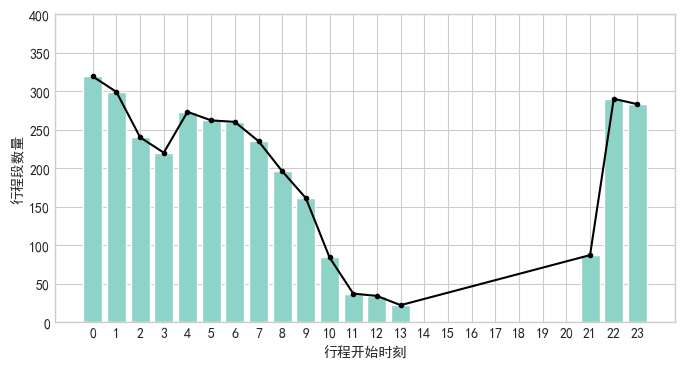

In [212]:
# 统计每小时行程数  --- 行程开始的时间分布
import datetime
s_data['Hour'] = s_data['Stime'].dt.hour
# s_data['Hour'] = s_data['Stime'].str[11:13].astype(int)  # 如果 Stime 是字符串
Hourcount_od = s_data.groupby('Hour')['Vehicle_Num'].count()
Hourcount_od = Hourcount_od.rename('count').reset_index()
# 绘制折线图
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
fig = plt.figure(1, (8, 4), dpi = 100)
ax = plt.subplot(111)

plt.plot(Hourcount_od['Hour'],Hourcount_od['count'],'k-')    
plt.plot(Hourcount_od['Hour'],Hourcount_od['count'],'k.')    
plt.bar(Hourcount_od['Hour'],Hourcount_od['count'])    
plt.ylabel('行程段数量')  
plt.xlabel('行程开始时刻')  
plt.xticks(range(24),range(24))    
plt.ylim(0,400)

plt.show()

In [213]:
# 查看行程开始时刻14-20时刻的样本idx
s_data[(s_data['Hour'] >= 14) & (s_data['Hour'] <= 20)].index

Index([], dtype='int64')

在行程开始时刻分布图中，我们可以看出14-20时刻开始的行程段很少，上面也进行了具体查看，只有[108,  139,  184,  430, 1290, 1291, 1674, 3053, 3250, 3251, 3252, 3358, 3444, 3446, 4774, 5081, 5085],  
说明大部分车（或行程）并不是从这些时刻开始的，我们考虑将14-20时刻开始的行程段剔除。

In [214]:
# 剔除14——20时刻的数据
s_data = s_data.drop(labels = s_data[(s_data['Hour'] >= 14) & (s_data['Hour'] <= 20)].index , axis = 0)

### 4.2 行程持续时间分布

In [215]:
s_data.T

,4,5,6,7,8,9,10,11,12,13,...,5112,5113,5114,5116,5117,5118,5120,5122,5123,5125
Vehicle_Num,AA00001,AA00001,AA00001,AA00001,AA00001,AA00001,AA00001,AA00001,AA00001,AA00001,...,AM00337,AM00337,AM00337,AM00337,AM00337,AM00343,AM00428,AM00428,AM00428,AM00428
编号,5,6,7,9,10,11,12,13,14,15,...,5388,5389,5390,5392,5393,5394,5396,5398,5399,5401
怠速不良次数,8,3,4,3,11,2,1,4,2,5,...,3,3,3,3,5,7,4,10,7,14
怠速次数,24,11,16,7,20,2,1,8,2,16,...,6,9,10,5,12,57,8,30,17,35
疲劳驾驶时长,220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1432.0,0.0,0.0,0.0,2606.0
驾驶时长,14620.0,1970.0,2363.0,1344.0,13722.0,5696.0,2737.0,3677.0,932.0,2106.0,...,1467.0,2370.0,2845.0,2787.0,2670.0,15832.0,7750.0,5885.0,4925.0,17006.0
驾驶里程,234.0,16.0,15.0,13.0,225.0,103.0,60.0,52.0,11.0,14.0,...,15.0,19.0,31.0,28.0,31.0,38.0,139.0,46.0,45.0,125.0
超速里程,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
急加速次数,20,9,11,5,13,1,1,13,0,16,...,5,6,7,5,7,39,7,22,9,24
急减速次数,23,11,8,4,16,2,2,12,0,15,...,5,6,6,5,9,37,8,27,15,27


不同时刻开始的行程段持续时间与平均速度箱线图

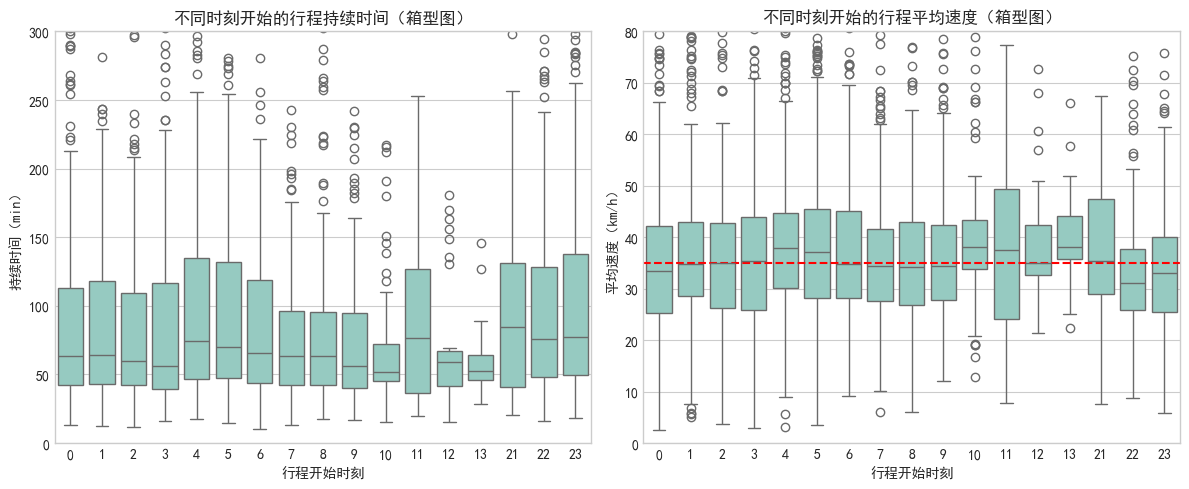

In [220]:
# 设置图像大小和布局
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1行2列，左右布局

# 左侧子图：绘制箱型图
axes[0].set_title('不同时刻开始的行程持续时间（箱型图）')
sns.boxplot(x="Hour", y=s_data["驾驶时长"]/60, data=s_data, ax=axes[0])  # 驾驶时长转化为分钟
axes[0].set_xlabel('行程开始时刻')
axes[0].set_ylabel('持续时间（min）')  
axes[0].set_ylim(0,300)

# 右侧子图：绘制平均账单柱状图
axes[1].set_title('不同时刻开始的行程平均速度（箱型图）')
sns.boxplot(x="Hour", y=s_data["avg_speed"], data=s_data, ax=axes[1])  
axes[1].set_xlabel('行程开始时刻')
axes[1].set_ylabel('平均速度（km/h）')  
axes[1].axhline(y=35, ls='--', c='red')  # 添加水平线
axes[1].set_ylim(0,80)

plt.tight_layout()  # 美化排版
plt.show()

按月统计行程数

In [184]:
## 得到月份
import datetime
s_data['month'] = s_data['Stime'].dt.month
month = s_data['month'].unique()
month
## 月份仅包含 7、8、9、10四个月份

array([ 8,  9, 10,  7])

行程段是7、8、9、10月份的数据

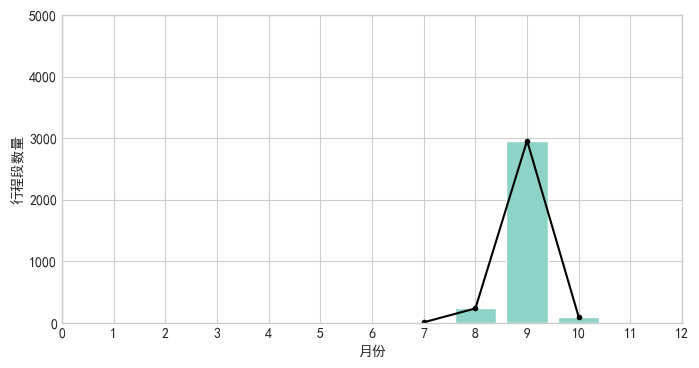

In [208]:
# 统计每月的行程数
Hourcount_od = s_data.groupby('month')['Vehicle_Num'].count()
Hourcount_od = Hourcount_od.rename('count').reset_index()
# 绘制折线图
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
fig = plt.figure(1, (8, 4), dpi = 100)
ax = plt.subplot(111)

plt.plot(Hourcount_od['month'],Hourcount_od['count'],'k-')    
plt.plot(Hourcount_od['month'],Hourcount_od['count'],'k.')    
plt.bar(Hourcount_od['month'],Hourcount_od['count'])    
plt.ylabel('行程段数量')  
plt.xlabel('月份')  
plt.xticks(range(13),range(13))     
plt.ylim(0,5000)

plt.show()

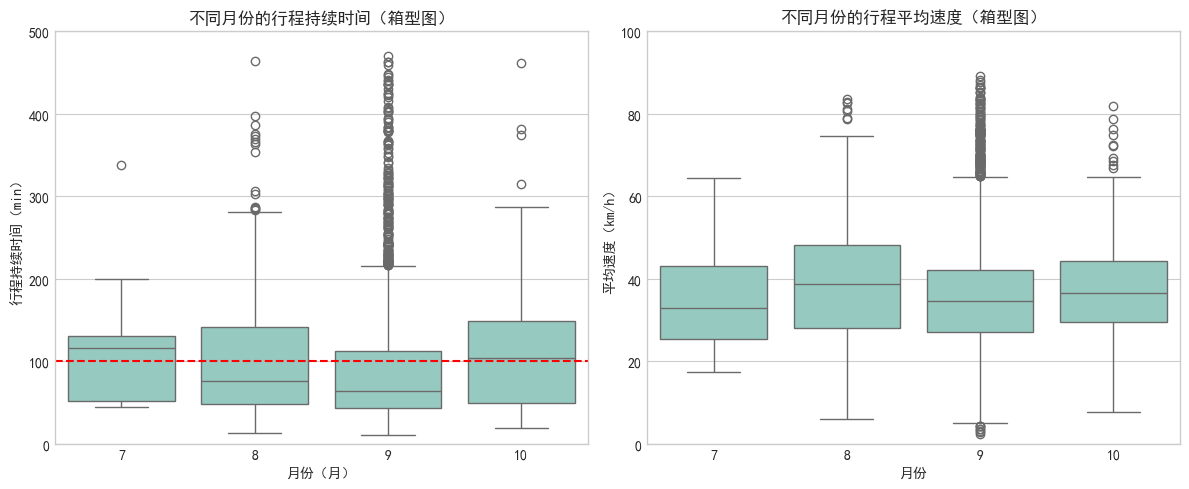

In [202]:
# 设置图像大小和布局
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1行2列，左右布局

# 左侧子图：绘制箱型图
axes[0].set_title('不同月份的行程持续时间（箱型图）')
sns.boxplot(x="month", y=s_data["驾驶时长"]/60, data=s_data,ax = axes[0])  # 驾驶时长转化为分钟
axes[0].set_xlabel('月份（月）')
axes[0].set_ylabel('行程持续时间（min）')
axes[0].set_ylim(0,500)
axes[0].axhline(y=100, ls='--', c='red') # 添加水平线

# 右侧子图：绘制平均账单柱状图
axes[1].set_title('不同月份的行程平均速度（箱型图）')
sns.boxplot(x="month", y=s_data["avg_speed"], data=s_data, ax = axes[1])  
axes[1].set_xlabel('月份') 
axes[1].set_ylabel('平均速度（km/h）') 
axes[1].set_ylim(0,100)
# axes[1].axhline(y=30, ls='--', c='red') # 添加水平线

plt.tight_layout()  # 美化排版
plt.show()

行程时长 与 平均速度 单因素方差分析

In [191]:
# 行程时长的单因素方差分析
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
s_data['con_min'] = s_data['驾驶时长'] / 60
model = ols('con_min~C(month)',data=s_data).fit()
anova_table = anova_lm(model, typ = 2)
print(anova_table)

                sum_sq      df          F    PR(>F)
C(month)  1.693870e+05     3.0  10.248433  0.000001
Residual  1.816987e+07  3298.0        NaN       NaN


In [196]:
# 平均速度单因素方差分析
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('avg_speed~C(month)',data=s_data).fit()
anova_table = anova_lm(model, typ = 2)
print(anova_table)

                 sum_sq      df         F    PR(>F)
C(month)    3726.455202     3.0  6.090608  0.000395
Residual  672612.104548  3298.0       NaN       NaN


In [227]:

import datetime
s_data['year'] = s_data['Stime'].dt.year
s_data['month'] = s_data['Stime'].dt.month
s_data['date'] = s_data['Stime'].dt.day
years = s_data['year'].unique()  # 得到年份
months = s_data['month'].unique()  # 得到月份
dates = s_data['date'].unique()  # 得到日期
print("年份包含：", years)
print("月份包含：", months)
print("日期包含：", dates)

年份包含： [2018]
月份包含： [ 8  9 10  7]
日期包含： [ 5  6  9 10 11 13  4  7  1  2  8 12 14 15 16 26 27 24 25 28 29 30 31  3
 21 19]


年份仅包含2018年，无法进行分析

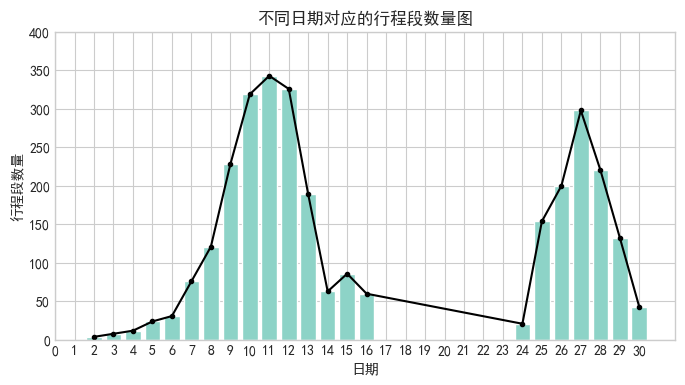

In [229]:
# 统计每天的行程数
date_data = s_data[s_data['month'] == 9]
Hourcount_od = date_data.groupby('date')['Vehicle_Num'].count()
Hourcount_od = Hourcount_od.rename('count').reset_index()
# 绘制折线图
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus']=False
fig = plt.figure(1, (8, 4), dpi = 100)
ax = plt.subplot(111)

plt.plot(Hourcount_od['date'],Hourcount_od['count'],'k-')    
plt.plot(Hourcount_od['date'],Hourcount_od['count'],'k.')    
plt.bar(Hourcount_od['date'],Hourcount_od['count'])    
plt.ylabel('行程段数量')  
plt.xlabel('日期')  
plt.xticks(range(31),range(31))  
plt.title('不同日期对应的行程段数量图')
plt.ylim(0, 400)
plt.show()

In [230]:
s_data.columns

Index(['Vehicle_Num', '编号', '怠速不良次数', '怠速次数', '疲劳驾驶时长', '驾驶时长', '驾驶里程', '超速里程',
       '急加速次数', '急减速次数', '危险转向次数', 'Stime', 'Smile', 'avg_speed',
       'drive_overtime_rate', 'daisubuliang_rate', 'wxzx_rate', 'chaosu_rate',
       'jijiasu_rate', 'jijiansu_rate', 'drive_mile', 'Hour', 'month',
       'con_min', 'year', 'date'],
      dtype='object')

array([[<Axes: xlabel='avg_speed', ylabel='avg_speed'>,
        <Axes: xlabel='Smile', ylabel='avg_speed'>,
        <Axes: xlabel='drive_overtime_rate', ylabel='avg_speed'>,
        <Axes: xlabel='daisubuliang_rate', ylabel='avg_speed'>,
        <Axes: xlabel='wxzx_rate', ylabel='avg_speed'>,
        <Axes: xlabel='chaosu_rate', ylabel='avg_speed'>,
        <Axes: xlabel='jijiasu_rate', ylabel='avg_speed'>,
        <Axes: xlabel='jijiansu_rate', ylabel='avg_speed'>,
        <Axes: xlabel='drive_mile', ylabel='avg_speed'>],
       [<Axes: xlabel='avg_speed', ylabel='Smile'>,
        <Axes: xlabel='Smile', ylabel='Smile'>,
        <Axes: xlabel='drive_overtime_rate', ylabel='Smile'>,
        <Axes: xlabel='daisubuliang_rate', ylabel='Smile'>,
        <Axes: xlabel='wxzx_rate', ylabel='Smile'>,
        <Axes: xlabel='chaosu_rate', ylabel='Smile'>,
        <Axes: xlabel='jijiasu_rate', ylabel='Smile'>,
        <Axes: xlabel='jijiansu_rate', ylabel='Smile'>,
        <Axes: xlabel='drive_mil

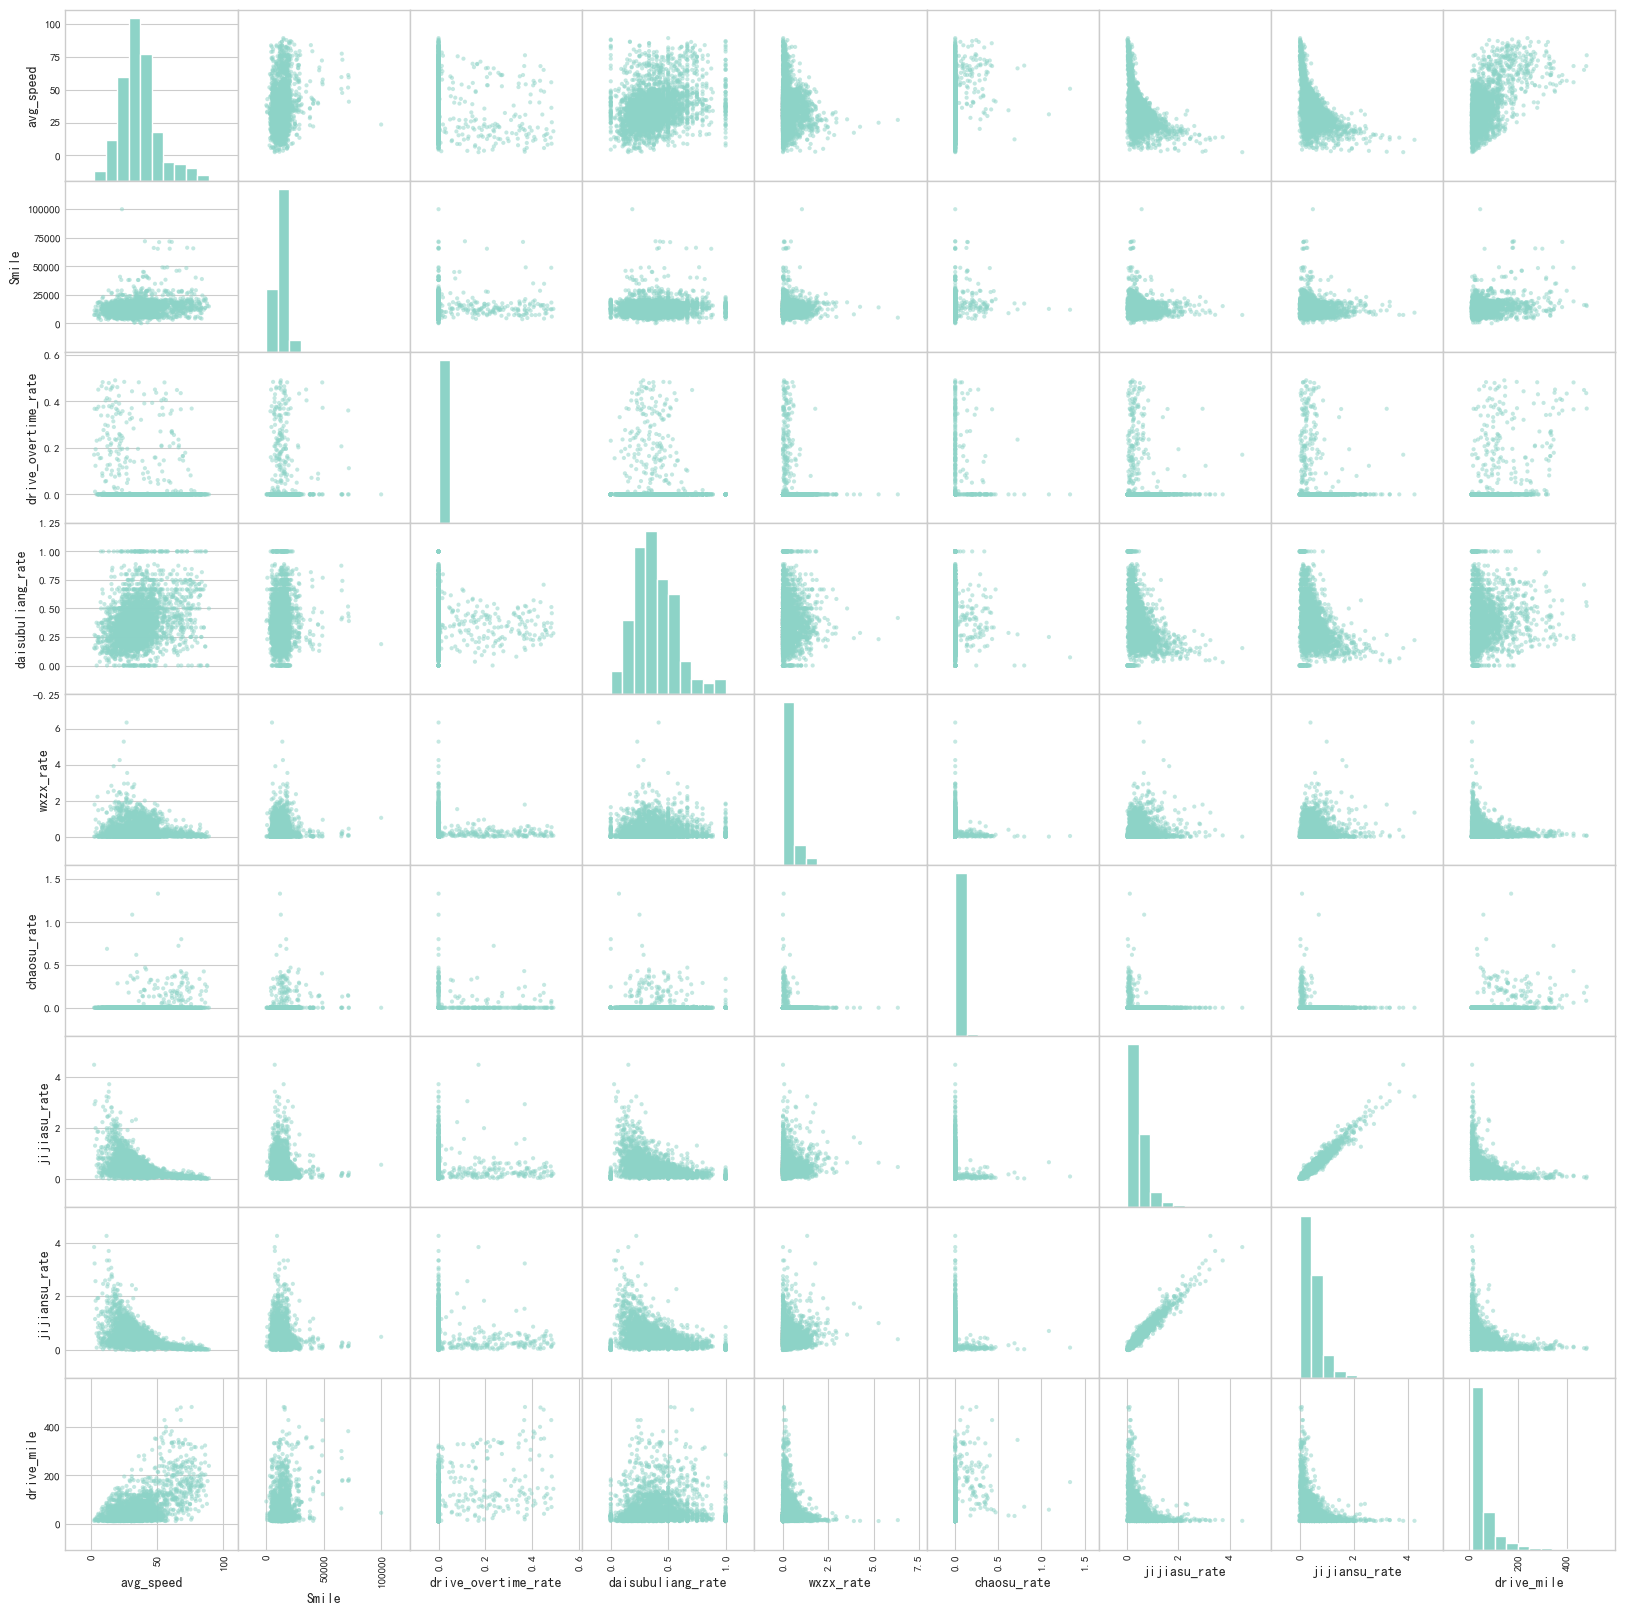

In [ ]:
# 绘制变量间相关性图
import pandas as pd
corr_data = s_data[['avg_speed', 'Smile', 'drive_overtime_rate', 'daisubuliang_rate', 'wxzx_rate', 'chaosu_rate', 'jijiasu_rate', 'jijiansu_rate', 'drive_mile']]
pd.plotting.scatter_matrix(corr_data, figsize=(20,20),range_padding=0.5)

# 5、聚类分析/无监督学习

In [ ]:
from sklearn import metrics

In [233]:
df_data = s_data[['Vehicle_Num', 'avg_speed', 'drive_overtime_rate', 'daisubuliang_rate', 'chaosu_rate', 'jijiasu_rate', 'jijiansu_rate', 'drive_mile']]
df_data.columns = ['Vehicle_Num', '平均速度', '疲劳驾驶率', '怠速不良率','超速率', '急加速率', '急减速率', '行驶里程']
df_data.columns

Index(['Vehicle_Num', '平均速度', '疲劳驾驶率', '怠速不良率', '超速率', '急加速率', '急减速率', '行驶里程'], dtype='object')

<Figure size 640x480 with 0 Axes>

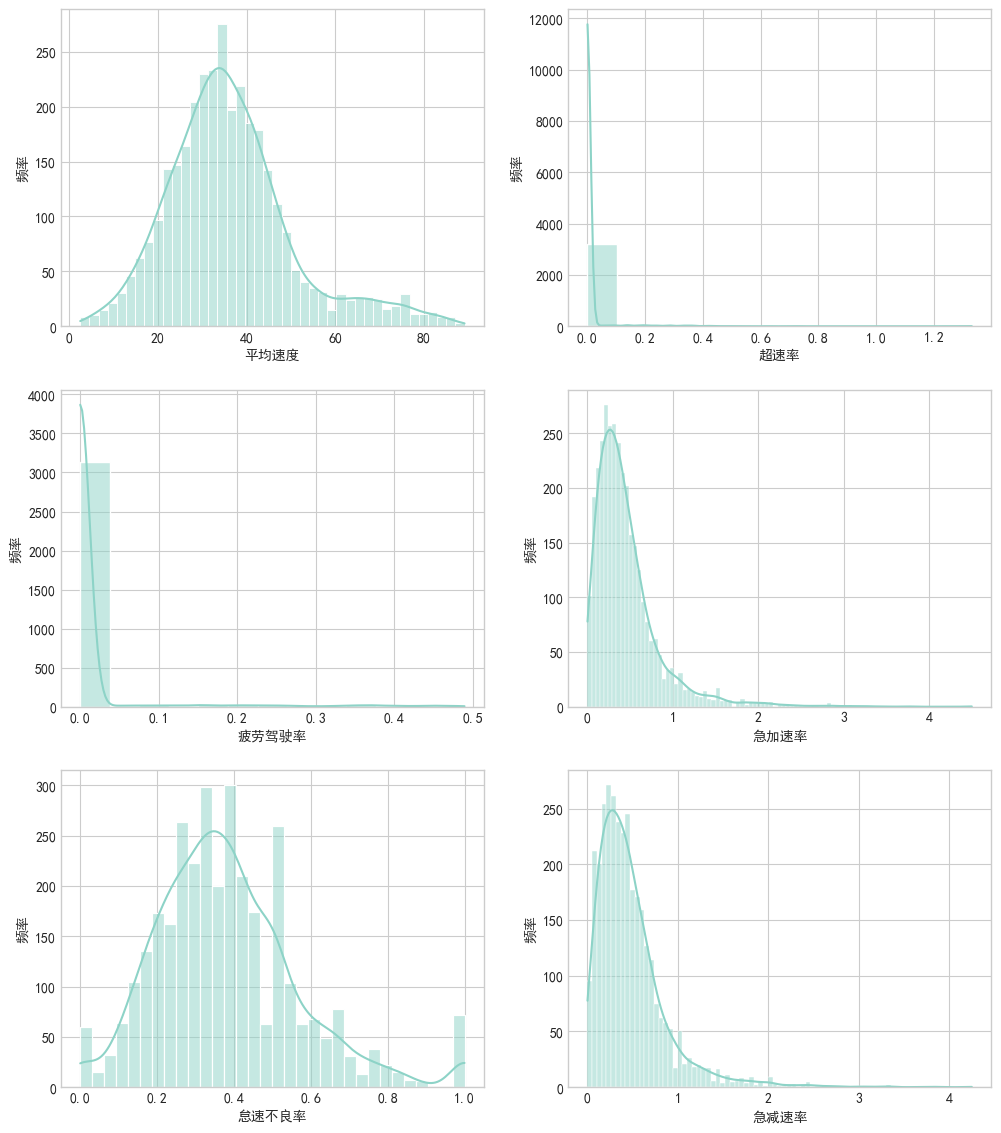

In [236]:
# 创建第1个窗口
plt.figure(1)
# 创建第1个子图
fig, axs = plt.subplots(3, 2, figsize=(12, 14))# 生成1列2行的画布
plt.rcParams['font.sans-serif'] = 'SimHei' 
# 平均速度
col = df_data.columns
l = 1 # 因为第一列为车辆编号，要跳过
for i in range(axs.shape[1]):
    for j in range(axs.shape[0]):
        g = sns.histplot(data = df_data.iloc[:,l], ax = axs[(j, i)], kde=True)#, kde=True
        # 使用自定义轴标签
        g.set( xlabel = col[l], ylabel = '频率')
        l += 1

[Text(0.5, 0, '行驶里程'), Text(0, 0.5, '频率')]

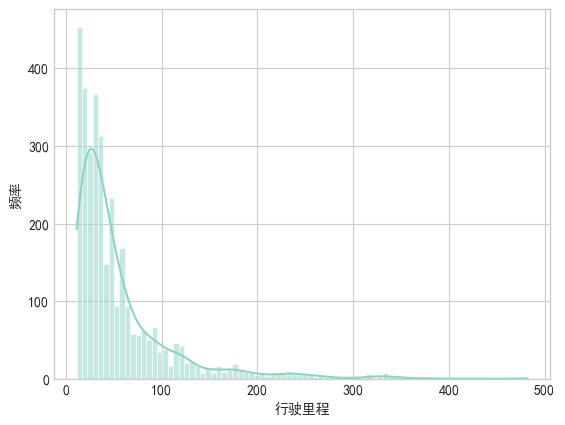

In [237]:
# 创建第2个窗口
plt.figure(2)
plt.rcParams['font.sans-serif'] = 'SimHei' 
g = sns.histplot(data = df_data.iloc[:,-1], kde=True)#, kde=True
g.set( xlabel = col[-1], ylabel = '频率')

In [278]:
s_data.shape

(3302, 31)

In [277]:
df_data.shape

(3302, 8)

### 5.1 K-means聚类分析

In [239]:
df2 = df_data.drop(['Vehicle_Num'],axis = 1)

from sklearn.preprocessing import StandardScaler
# 数据标准化处理，消除量纲影响
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

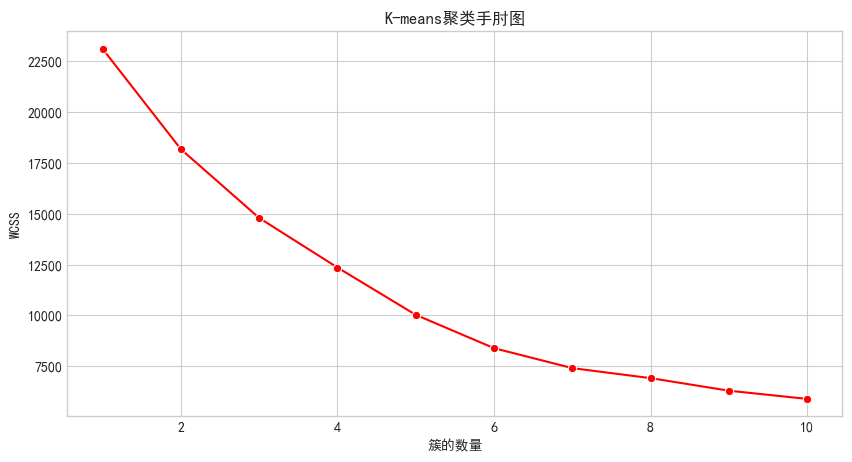

In [242]:
from sklearn.cluster import KMeans
# WCSS 中心距离平方和  --  聚类效果的一个评价指标。
X = scaled_data
seed = 123
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = seed)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # 获取K-means算法的SSE

plt.figure(figsize=(10,5))
sns.lineplot(x = range(1, 11), y = wcss, marker='o', color='red')
plt.title('K-means聚类手肘图')
plt.xlabel('簇的数量')
plt.ylabel('WCSS')
plt.show()

In [243]:
# 确定最优聚类个数后进行聚类
km = KMeans(n_clusters = 3, random_state=seed)
km.fit(X)#对Kmeans模型进行训练
#使用训练好的模型进行预测
y_cluster_kmeans = km.predict(X)
labels = y_cluster_kmeans

In [254]:
from sklearn.metrics import silhouette_score
from sklearn import metrics
def unpev(method, labels):
    # 计算轮廓系数
    score = silhouette_score(X,labels)
    # 计算CH值
    CH = metrics.calinski_harabasz_score(X, labels)
    # 计算DBI
    DBI = metrics.davies_bouldin_score(X, labels)
    print(str(method)+'聚类的轮廓系数为：' + str(round(score, 6)) +'，CH值为：'+str(round(CH, 6)) +'，DBI为：'+str(round(DBI, 6)))

In [255]:
kmeans_unpev = unpev('Kmeans',labels)

Kmeans聚类的轮廓系数为：0.299232，CH值为：928.11558，DBI为：1.070991


### 5.2 K-means++聚类分析

In [ ]:
from sklearn.cluster import KMeans

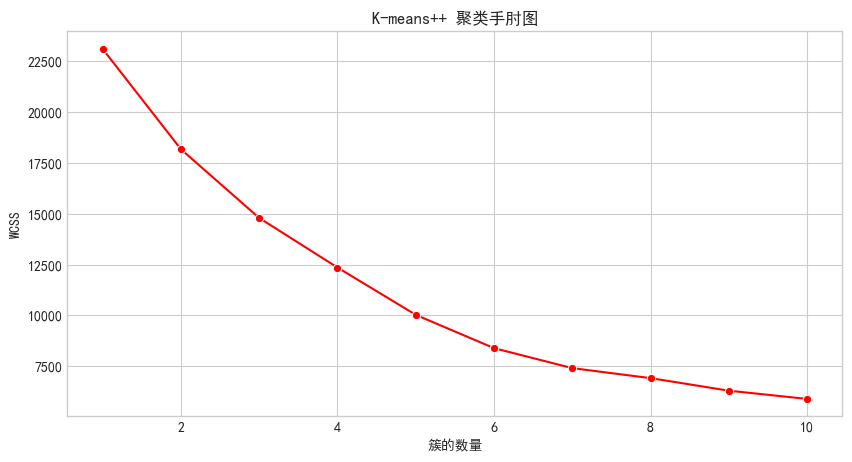

In [256]:
## K-means++聚类分析
seed = 123
X = scaled_data
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = seed)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # 获取K-means算法的 SSE

plt.figure(figsize=(10,5))
sns.lineplot(x = range(1, 11), y = wcss, marker='o', color='red')
plt.title('K-means++ 聚类手肘图')
plt.xlabel('簇的数量')
plt.ylabel('WCSS')
plt.show()

In [258]:
# 确定最优个数后重新聚类
nclusters = 3
km = KMeans(n_clusters=nclusters,init = 'k-means++', random_state = seed)
km.fit(X)#对Kmeans模型进行训练
#使用训练好的模型进行预测
y_cluster_kmeansplus = km.predict(X)

In [262]:
def countfun(j):
    m = 0
    for i in range(0, y_cluster_kmeansplus.shape[0]):
        if y_cluster_kmeansplus[i] == j:
            m = m + 1
    print('类别'+ str(j)+ '的个数为：'+str(m))

print(countfun(0))
print(countfun(1))
print(countfun(2))

类别0的个数为：855
None
类别1的个数为：2330
None
类别2的个数为：117
None


### 5.3 DBSCAN 密度聚类

In [266]:
# DBSCAN密度聚类
from sklearn.cluster import DBSCAN
from sklearn import metrics
from joblib import Parallel, delayed
import numpy as np
from tqdm import tqdm

# 参数范围
eps_range = range(1, 21)
min_samples_range = range(1, 100)

# 定义单个评估函数
def evaluate_dbscan(i, j):
    eps_val = 0.1 * i
    dbscan = DBSCAN(eps=eps_val, min_samples=j)
    labels = dbscan.fit_predict(X)
    if (max(labels) >= 2) and (max(labels) <= 5):  # 控制聚类个数
        try:
            score = metrics.silhouette_score(X, labels)
            return (i, j, score)
        except:
            return None
    return None

# 并行计算，使用所有CPU核
results = Parallel(n_jobs=-1)(
    delayed(evaluate_dbscan)(i, j)
    for i in tqdm(eps_range, desc="进度")
    for j in min_samples_range
)

# 过滤有效结果
results = [r for r in results if r is not None]
# 拆分结果
db_l1, db_l2, l_dbsc = zip(*results)

best_idx = np.argmax(l_dbsc)
print(f"最佳参数：eps = {0.1 * db_l1[best_idx]}, min_samples = {db_l2[best_idx]}")
print(f"对应轮廓系数：{l_dbsc[best_idx]}")

进度: 100%|██████████| 20/20 [00:42<00:00,  2.10s/it]


最佳参数：eps = 1.5, min_samples = 6
对应轮廓系数：0.5913775006688492


In [268]:
dbscan = DBSCAN(eps = 0.1 * db_l1[temp], min_samples = db_l2[temp])  # 创建DBSCAN对象，设置半径和最小样本数
DBSCAN_labels = dbscan.fit_predict(X)  # 进行聚类
dbscan_unpev = unpev('DBSCAN', DBSCAN_labels)

DBSCAN聚类的轮廓系数为：0.591378，CH值为：163.777296，DBI为：1.572073


In [273]:
s_data['kmeans_label'] = y_cluster_kmeans
s_data['kmeansplus_label'] = y_cluster_kmeansplus
s_data['DBSCAN_label'] = DBSCAN_labels
print("kmeans 聚类标签分布：")
print(s_data['kmeans_label'].value_counts())
print("**  **  **")
print("kmeans++ 聚类标签分布：")
print(s_data['kmeansplus_label'].value_counts())
print("**  **  **")
print("DBSCAN 聚类标签分布：")
print(s_data['DBSCAN_label'].value_counts())

kmeans 聚类标签分布：
kmeans_label
1    2330
0     855
2     117
Name: count, dtype: int64
**  **  **
kmeans++ 聚类标签分布：
kmeansplus_label
1    2330
0     855
2     117
Name: count, dtype: int64
**  **  **
DBSCAN 聚类标签分布：
DBSCAN_label
 0    3209
-1      72
 1      15
 2       6
Name: count, dtype: int64


# 6、有监督分类

In [279]:
# 导入库
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier# 随机森林回归
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score # 引入准确度评分函数
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family='Microsoft YaHei')

In [280]:
s_data.shape

(3302, 31)

In [281]:
s_data.columns

Index(['Vehicle_Num', '编号', '怠速不良次数', '怠速次数', '疲劳驾驶时长', '驾驶时长', '驾驶里程', '超速里程',
       '急加速次数', '急减速次数', '危险转向次数', 'Stime', 'Smile', 'avg_speed',
       'drive_overtime_rate', 'daisubuliang_rate', 'wxzx_rate', 'chaosu_rate',
       'jijiasu_rate', 'jijiansu_rate', 'drive_mile', 'Hour', 'month',
       'con_min', 'year', 'date', 'kmeans_label', 'kmeansplus_lable',
       'DBSCAN_labels', 'kmeansplus_label', 'DBSCAN_label'],
      dtype='object')

In [283]:
# 数据处理
X = s_data.iloc[:,2:11]
y = s_data['kmeans_label']
# 数据标准化处理，消除量纲影响
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # 创建StandardScaler对象
scaled_X = scaler.fit_transform(X)  # 对数据进行标准化处理
# 切分训练集和测试集
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(scaled_X, y, test_size=0.3, random_state=123)

### 6.1 随机森林分类

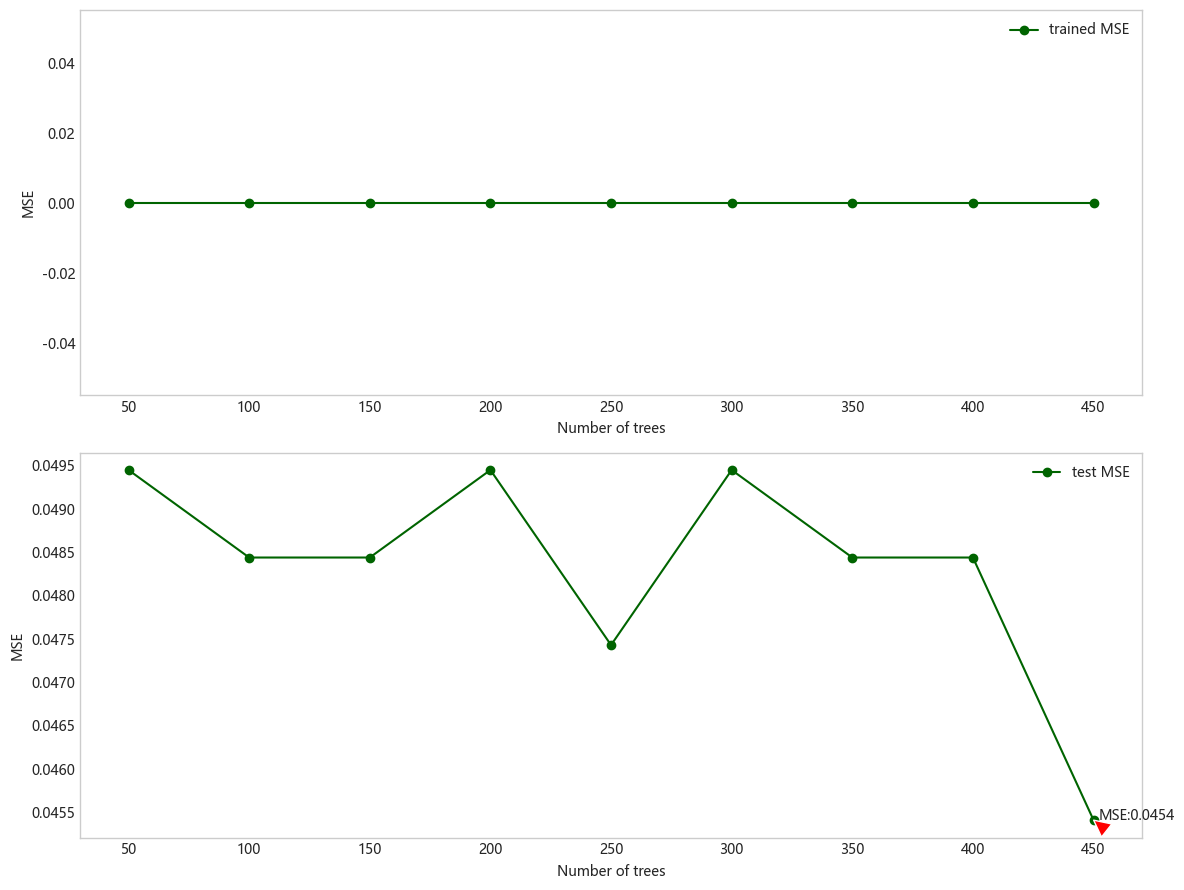

In [284]:
## 随机森林分类
# 随机森林模型 不需要对数据进行标准化or归一化处理
## 分析随着树数目的变化，在测试集和训练集上的预测效果

rfr1 = RandomForestClassifier(random_state=1)
n_estimators = np.arange(50,500,50)  # 420,440,2
train_mse = []
test_mse = []
for n in n_estimators:
    rfr1.set_params(n_estimators = n) # 设置参数
    rfr1.fit(train_x,train_y) # 训练模型
    rfr1_lab = rfr1.predict(train_x)
    rfr1_pre = rfr1.predict(test_x)
    train_mse.append(mean_squared_error(train_y,rfr1_lab))
    test_mse.append(mean_squared_error(test_y,rfr1_pre))

## 可视化不同数目的树情况下，在训练集和测试集上的均方根误差
plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
plt.plot(n_estimators,train_mse,'r-o',label='trained MSE',color='darkgreen')
plt.xlabel('Number of trees')
plt.ylabel('MSE')
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(n_estimators,test_mse,'r-o',label='test MSE',color='darkgreen')
index = np.argmin(test_mse)
plt.annotate('MSE:'+str(round(test_mse[index],4)),
             xy=(n_estimators[index],test_mse[index]),
             xytext=(n_estimators[index]+2,test_mse[index]+0.000002),
             arrowprops=dict(facecolor='red',shrink=0.02))
plt.xlabel('Number of trees')
plt.ylabel('MSE')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

最优参数以及最高得分: [200.           0.95369648]


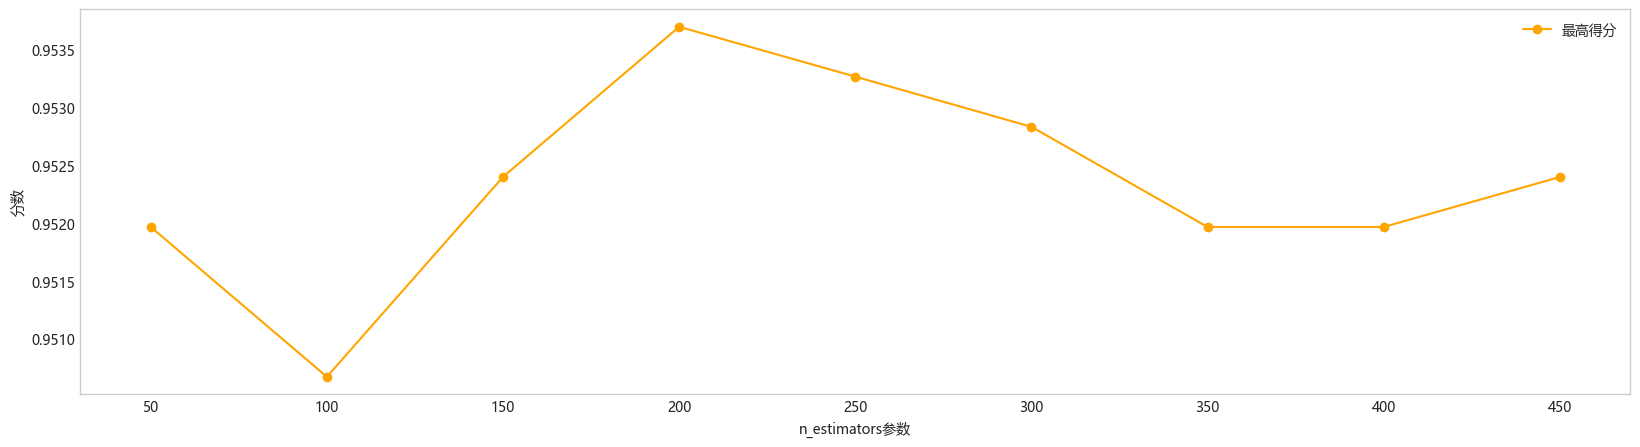

In [285]:
# 调n_estimators参数
ScoreAll = []
for i in range(50,500,50):
    DT = RandomForestClassifier(n_estimators = i,random_state = 1) #,criterion = 'entropy'
    score = cross_val_score(DT,train_x,train_y,cv=6).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1],'r-o',label='最高得分',color='orange')
plt.xlabel('n_estimators参数')
plt.ylabel('分数')
plt.grid()
plt.legend()
plt.show()

最优参数以及最高得分: [10.          0.95110468]


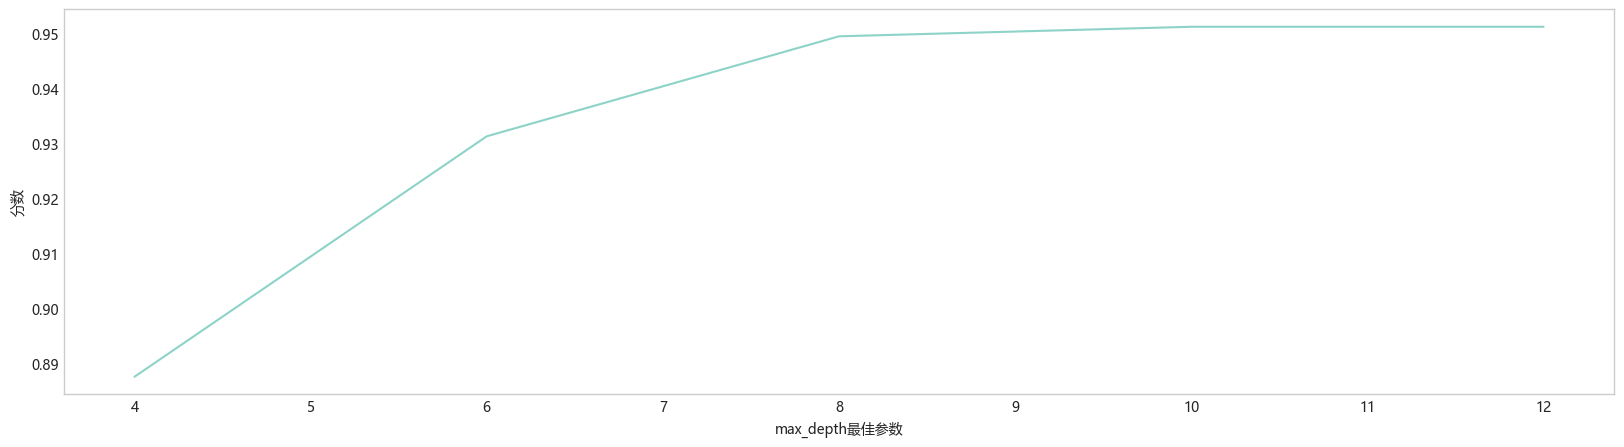

In [286]:
# 探索max_depth的最佳参数
ScoreAll = []  
for i in range(4,14,2):  
    DT = RandomForestClassifier(n_estimators = 400,random_state = 1,max_depth =i ) #,criterion = 'entropy'  
    score = cross_val_score(DT,train_x,train_y,cv=6).mean()  
    ScoreAll.append([i,score])  
ScoreAll = np.array(ScoreAll)  
    
max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] 
print("最优参数以及最高得分:",ScoreAll[max_score])    
plt.figure(figsize=[20,5])  
plt.plot(ScoreAll[:,0],ScoreAll[:,1]) 
plt.xlabel('max_depth最佳参数')
plt.ylabel('分数')
plt.grid()
plt.legend() 
plt.show()  

最优参数以及最高得分: [14.          0.95326245]


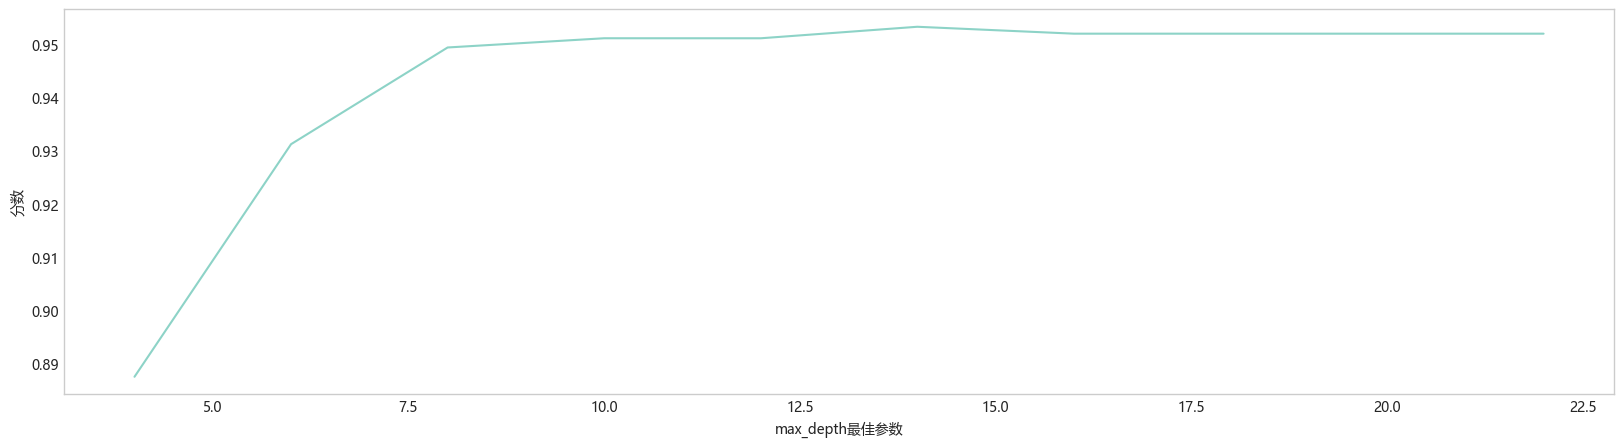

In [287]:
# 探索max_depth的最佳参数
ScoreAll = []  
for i in range(4,24,2):  
    DT = RandomForestClassifier(n_estimators = 400,random_state = 1,max_depth =i ) #,criterion = 'entropy'  
    score = cross_val_score(DT,train_x,train_y,cv=6).mean()  
    ScoreAll.append([i,score])  
ScoreAll = np.array(ScoreAll)  
    
max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] 
print("最优参数以及最高得分:",ScoreAll[max_score])    
plt.figure(figsize=[20,5])  
plt.plot(ScoreAll[:,0],ScoreAll[:,1]) 
plt.xlabel('max_depth最佳参数')
plt.ylabel('分数')
plt.grid()
plt.legend() 
plt.show()  

In [288]:
# 随机森林 分类模型  
model = RandomForestClassifier(n_estimators=100,max_depth=12,random_state=1) # min_samples_leaf=11
# 模型训练
model.fit(train_x, train_y)
# 模型预测
y_pred = model.predict(test_x)
print('训练集模型分数:', model.score(train_x, train_y))
print('测试集模型分数:', model.score(test_x,test_y))
print("训练集准确率: %.3f" % accuracy_score(train_y, model.predict(train_x)))
print("测试集准确率: %.3f" % accuracy_score(test_y, y_pred))

训练集模型分数: 1.0
测试集模型分数: 0.9576185671039354
训练集准确率: 1.000
测试集准确率: 0.958


混淆矩阵：
 [[ 608    0    0]
 [   0 1610    0]
 [   0    0   93]]


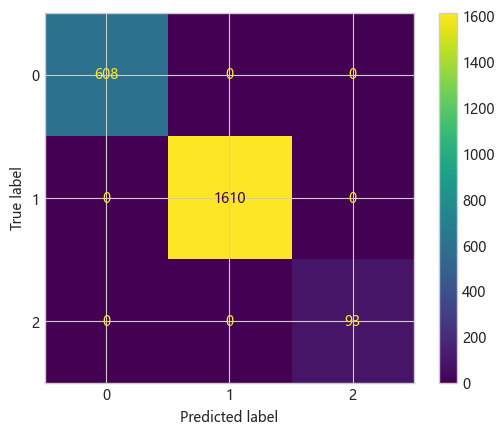

In [289]:
# 训练集混淆矩阵
from sklearn.metrics import confusion_matrix
import matplotlib.ticker as ticker
train_pre = model.predict(train_x)
cm = confusion_matrix(train_y, train_pre,labels=[0, 1, 2]) # ,
print('混淆矩阵：\n', cm)
labels=['0','1','2']
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm,display_labels=labels).plot()

混淆矩阵：
 [[226  20   1]
 [ 19 701   0]
 [  0   2  22]]


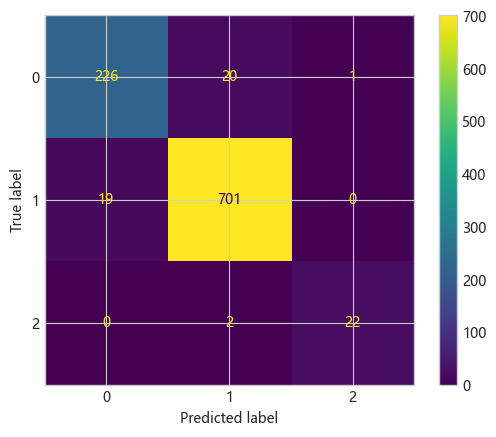

In [290]:
# 测试集混淆矩阵
from sklearn.metrics import confusion_matrix
import matplotlib.ticker as ticker

cm = confusion_matrix(test_y, y_pred,labels=[0, 1, 2]) # ,
print('混淆矩阵：\n', cm)
labels=['0','1','2']
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm,display_labels=labels).plot()

In [291]:
# 计算训练集的召回率等
# 准确率   召回率   精确率   F1
from sklearn import metrics
print('ACC:',metrics.accuracy_score(train_y, train_pre))  # 准确率
print('Precision',metrics.precision_score(train_y, train_pre, average='macro'))  # 精确率
print('Recall',metrics.recall_score(train_y, train_pre, average='macro'))  # 召回率
print('F1-score:',metrics.f1_score(train_y, train_pre, average='macro'))  # F1值
## https://blog.csdn.net/holal/article/details/106518411

ACC: 1.0
Precision 1.0
Recall 1.0
F1-score: 1.0


In [294]:
# 计算测试集的召回率等
# 准确率   召回率   精确率   F1
from sklearn import metrics
print('ACC:', round(metrics.accuracy_score(test_y, y_pred), 6))  # 准确率
print('Precision', round(metrics.precision_score(test_y, y_pred, average='macro'), 6))  # 精确率
print('Recall', round(metrics.recall_score(test_y, y_pred, average='macro'), 6))  # 召回率
print('F1-score:', round(metrics.f1_score(test_y, y_pred, average='macro'), 6))  # F1值
## https://blog.csdn.net/holal/article/details/106518411

ACC: 0.957619
Precision 0.949514
Recall 0.935086
F1-score: 0.942152


In [295]:
## 特征重要性
# 对数组中的每个元素使用round()函数保留指定位数
def round_array(array, num_decimal_places):
    return [round(num, num_decimal_places) for num in array]
# 示例用法
array = model.feature_importances_
num_decimal_places = 2
result = round_array(array, num_decimal_places)
print(result)  # 输出: [1.23, 2.35, 3.46]

[0.05, 0.13, 0.07, 0.14, 0.34, 0.0, 0.14, 0.1, 0.03]


In [300]:
zzt = pd.DataFrame((X.columns.values).T, columns = ['label'])
zzt['feature_importances'] = np.array(result).T
zzt=zzt.sort_values(by='feature_importances',ascending = True , axis = 0) # ascending：升序
zzt

,label,feature_importances
5,超速里程,0.00
8,危险转向次数,0.03
0,怠速不良次数,0.05
2,疲劳驾驶时长,0.07
7,急减速次数,0.10
1,怠速次数,0.13
3,驾驶时长,0.14
6,急加速次数,0.14
4,驾驶里程,0.34


[Text(0, 0, '0'),
 Text(0, 0, '0.03'),
 Text(0, 0, '0.05'),
 Text(0, 0, '0.07'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.13'),
 Text(0, 0, '0.14'),
 Text(0, 0, '0.14'),
 Text(0, 0, '0.34')]

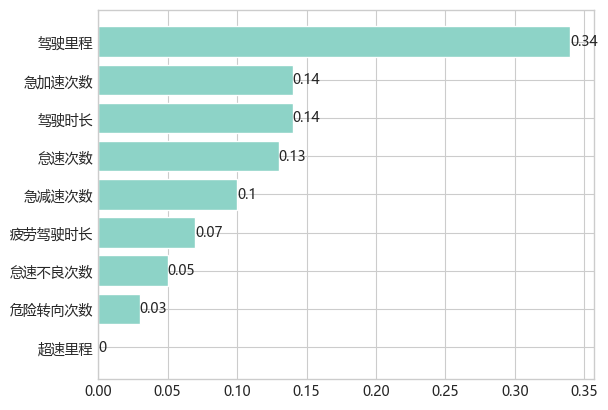

In [302]:
# 特征重要性可视化
p1 = plt.barh(zzt['label'], width=zzt['feature_importances'])
plt.bar_label(p1, label_type='edge')   # label_type=‘edge’表示将数据值标签放在柱子顶端，label_type=‘center’表示将数据值标签放在柱子中间。
#plt.bar_label(labels=zzt2['feature_importances'])   # label_type=‘edge’表示将数据值标签放在柱子顶端，label_type=‘center’表示将数据值标签放在柱子中间。
# plt.title('The distribution of XXX')
# plt.show()

In [303]:
# 绘制三分类 ROC 曲线
import pandas as pd
# 第一步，计算每个分类的预测结果概率
from sklearn.metrics import roc_curve, auc
df_temp = pd.DataFrame()
pre_score = model.predict_proba(test_x)
pre1 = np.array(pre_score[:,0])
pre2 = np.array(pre_score[:,1])
pre3 = np.array(pre_score[:,2])

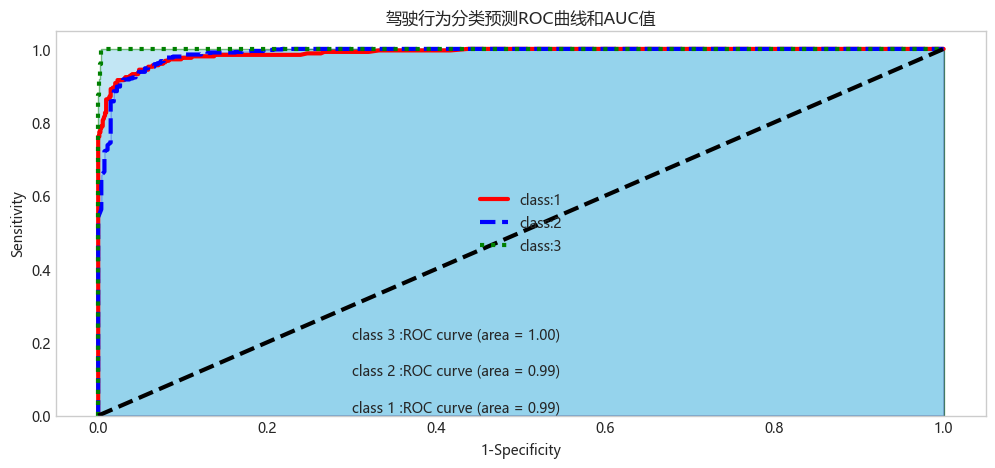

In [304]:
# 第二步，画图数据准备
df_temp['y_test'] = test_y.to_list()
y_list = df_temp['y_test'].to_list()
pre_list=[pre1, pre2, pre3]

lable_names=['1','2','3']
colors1 = ["r","b","g"]       # 'gold','pink','y','c','m','orange','chocolate'
colors2 = ["skyblue"]         # "mistyrose","skyblue","palegreen"
my_list = []
linestyles =["-", "--", ":"]  # ,"-", "--", ":","-", "--", ":","-"

# 第三步，绘制三分类ROC曲线
plt.figure(figsize=(12,5),facecolor='w')
for i in range(3):
    roc_auc = 0
     #添加文本信息
    if i==0:
        fpr, tpr, threshold = roc_curve(y_list,pre_list[i],pos_label=0)
        # 计算AUC的值
        roc_auc = auc(fpr, tpr)
        plt.text(0.3, 0.01, "class "+lable_names[i]+' :ROC curve (area = %0.2f)' % roc_auc)
    elif i==1:
        fpr, tpr, threshold = roc_curve(y_list,pre_list[i],pos_label=1)
        # 计算AUC的值
        roc_auc = auc(fpr, tpr)
        plt.text(0.3, 0.11, "class "+lable_names[i]+' :ROC curve (area = %0.2f)' % roc_auc)
    elif i==2:
        fpr, tpr, threshold = roc_curve(y_list,pre_list[i],pos_label=2)
        # 计算AUC的值
        roc_auc = auc(fpr, tpr)
        plt.text(0.3, 0.21, "class "+lable_names[i]+' :ROC curve (area = %0.2f)' % roc_auc)

    my_list.append(roc_auc)
    # 添加ROC曲线的轮廓
    plt.plot(fpr, tpr, color = colors1[i],linestyle = linestyles[i],linewidth = 3,
             label = "class:"+lable_names[i])  #  lw = 1,
    # 绘制面积图
    plt.stackplot(fpr, tpr, colors=colors2, alpha = 0.5,edgecolor = colors1[i]) #  alpha = 0.5,
   
# 添加对角线
plt.plot([0, 1], [0, 1], color = 'black', linestyle = '--',linewidth = 3)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.grid()
plt.legend()
plt.title("驾驶行为分类预测ROC曲线和AUC值")
plt.show()

### 6.2 XGBOOST分类

In [ ]:
import xgboost
from numpy import loadtxt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### PCA 主成分分析

### 因子分析